# <center> CSCI E-83 Final Project </center>
## <center> Solar Watch: Tracing X-Ray Footprints to Anticipate Solar Flares (2001-2023) </center>
#### Student: David W. Trott <br>
Submitted: 20 December 2023

#### Table of Contents
#### I. Executive Summary
#### II. Introduction
#### III. Dataset Selection
#### IV. Data Exploration
#### V. Model Selection
#### VI. Results
#### VII. References
#### VIII. Full Code Reference

#### I. Executive Summary:

This technical report summarizes the use of time-series analysis to forecast solar flare activity, which poses significant risks to our technologically reliant society. The analysis centered around NOAA's solar x-ray flux data, which spans more than two decades. Initial models, including an ARIMA(1,1,0) configuration, provided moderate predictive accuracy but lacked the sophistication to encapsulate the complex behavior of solar activity. Subsequent iterations, incorporating auto-regressive components and seasonal adjustments, yielded slight improvements; however, these models still struggled to capture the overarching trends and intricate seasonal patterns dictated by the 11-year solar cycle.

Further model refinement was achieved through a SARIMA model enhanced with Fourier terms to account for the long-term cyclicity in solar activity, resulting in better alignment with observed patterns. Overall, the models confronted difficulties in accurately predicting long-term trends, as evidenced by error metrics such as MAE and MAPE. The study concludes that while strides have been made in predicting solar flares using statistical models, the inherent complexity of solar phenomena necessitates continued research. This may involve integrating a broader set of data sources and exploring more advanced analytical methods to improve forecast accuracy and reliability.

#### II. Introduction:

Our society has become increasingly reliant on sophisticated systems vulnerable to solar activity. Among these phenomena, solar flares stand out due to their potential to disrupt critical infrastructure. These powerful bursts of radiation, emanating from the Sun, can severely impact electrical grids, satellite communications, and navigation systems on Earth. The historical Carrington Event of 1859 serves as a reminder of our susceptibility; this intense geomagnetic solar storm caused widespread disruption to the telegraph network, showcasing the potential havoc that modern solar events could wreak on our even more interconnected and technologically dependent world.  However, more recent events have shown that this is not just a concern of the past. For instance, in 1989, a powerful solar storm led to a nine-hour outage of the Hydro-Québec power grid in Canada, affecting six million people and exemplifying the vulnerability of electrical grids to solar phenomena. Similarly, in 2003 (Figure 1), the "Halloween Storms" caused satellite malfunctions, disrupted communication systems, and even led to rerouted flights due to radio blackouts, demonstrating the multifaceted risks associated with intense solar activity.

<br>
<figure>
    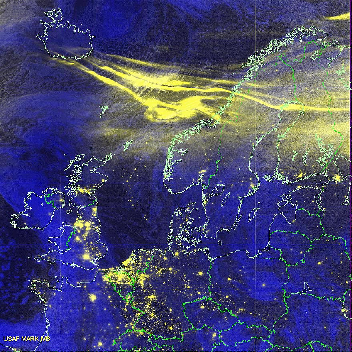
    <center><figcaption><b>Figure 1:</b> 2003 Halloween Storms: Composite image showing aurorae over northern Europe, taken by DMSP on October 30, 2003 [1]</figcaption></center>
</figure>

This project is based in the pressing need to understand and predict solar flares effectively. The objective is to harness the power of statistical models to analyze time series data of solar x-ray flux, a key indicator of solar flare activity. By exploring over two decades of data from the National Oceanic and Atmospheric Administration (NOAA), this study aims to develop predictive models that can serve as early warning systems for solar flare occurrences. 

The challenge lies in the intricate nature of solar phenomena and the complexity of accurately modeling these events. X-ray flux, as measured by NOAA's Geostationary Operational Environmental Satellites (GOES), provides a quantifiable measure of solar activity, offering insights into the varying intensities and occurrences of solar flares. The intricacies of these measurements, coupled with their profound implications, necessitate a rigorous analytical approach.

The task of modeling solar flare activity using x-ray flux data presents several technical challenges that must be addressed to develop accurate and reliable predictive models. Key among these challenges is managing and processing the sheer volume of data, the noise and variability inherent in the data, and the complexities associated with time-series forecasting.

<ul>
    <li><b>Handling Large Datasets:</b> The large volume of data presents a significant challenge in terms of computational resources and efficiency. Processing and analyzing such a dataset requires robust data handling strategies. The size of the dataset can lead to increased computational time and memory usage, particularly when applying complex machine learning algorithms. Efficient data processing techniques are needed to handle this large-scale data without compromising on the performance of the analytical procedures.</li>
    <li><b>Data Noise and Variability:</b> The x-ray flux data captured by the GOES satellites is subject to various forms of noise and inconsistencies. Solar observations can be affected by multiple factors such as satellite instrumentation variances, atmospheric interference, and cosmic events, leading to fluctuations in the data that may not be directly related to solar flare activities. Identifying and mitigating the impact of such noise is required for accurate model development. Techniques like data smoothing, anomaly detection, and robust statistical methods are employed to address these challenges.</li>
    <li><b>Complexities in Time-Series Analysis:</b> The dataset represents a time-series, which inherently brings difficulties like seasonality, trend components, and autocorrelation. Solar activity follows an 11-year cycle, adding a layer of complexity in identifying patterns and making long-term forecasts. This necessitates the use of advanced time-series analysis techniques, such as ARIMA and SARIMA, which are capable of handling seasonality, trends, and other time dynamics.</li>
    <li><b>Handling Missing and Incomplete Data:</b> Given the long-term nature of the dataset, spanning over two decades, there are instances of missing or incomplete data. This could be due to various reasons, including technical issues with satellite sensors or data transmission errors. Techniques such as data interpolation and imputation were needed.</li>
    <li><b>Model Selection and Evaluation:</b> With a wide array of predictive models available, selecting the most suitable model for this specific application is a challenge. The model needs to not only fit the historical data well but also generalize effectively to make accurate predictions. Rigorous model evaluation metrics and a thorough understanding of the underlying physical phenomena were needed in selecting and tuning the models.</li>
</ul>

#### III. Dataset Selection:

For the purpose of accurately predicting solar flares using x-ray flux data, a reliable dataset was important. We selected a comprehensive dataset titled 'combined_data.csv', a compilation of over 11 million data points, spanning from March 2001 to June 2023 (Figure 2). This dataset, which occupies approximately 388MB of storage space, was sourced from the National Oceanic and Atmospheric Administration (NOAA) and is publicly accessible on Kaggle.com, ensuring transparency and reproducibility in our research.

<br>
<figure>
    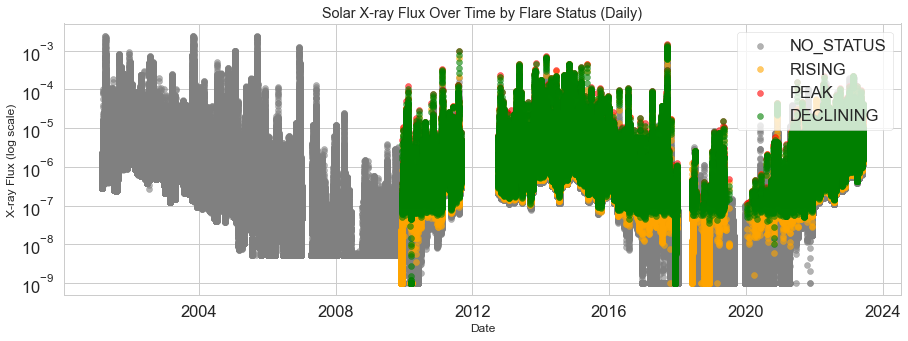
    <center><figcaption><b>Figure 2:</b> GEOS Data: X-ray Flux March 2001 to June 2023 (1 minute frequency).</figcaption></center>
</figure>


The dataset consists of 1-minute frequency x-ray data, gathered by NOAA's Geostationary Operational Environmental Satellites (GOES). These satellites have been operational since 1974 and play an important role in monitoring Earth's space weather conditions. The long-term operational span of these satellites has been instrumental in providing consistent and high-quality data essential for our analysis.

Central to our study are two key variables captured by the GOES satellites' onboard X-Ray Sensor: solar irradiance (measured as xray_flux) and solar flare statuses. The xray_flux data provides quantifiable measurements of the sun's emitted x-ray energy per unit area, offering insights into the intensity and variations of solar emissions over time. Additionally, the dataset classifies solar flare statuses, providing a categorical understanding of the stages and intensities of solar flares. By having both quantitative and categorical variables it allows for a multiple approaches for analysis.

This dataset's high resolution and long-term coverage are invaluable for analyzing solar activity patterns and understanding the dynamic nature of solar flares. The extensive time range covered by the data ensures that our analysis encapsulates various solar cycles, thereby enriching our predictive model's robustness and accuracy. Moreover, the granularity of 1-minute intervals allows for a detailed examination of solar flare progression and retreat, critical for developing early warning systems for solar flare events.

#### IV. Data Exploration:
In solar physics, even small changes in x-ray flux can be significant. They can indicate various solar phenomena, such as the emergence of new sunspots, solar flares, or changes in the sun's magnetic field. The x-ray flux values, especially when they are on the higher end of the scale, are indicators of solar events that could potentially impact Earth's space environment.

Analyzing the dataset reveals some key insights into the nature and quality of the data collected for x-ray flux and flare status. The x-ray flux, consists of approximately 10 million entries of solar activity. The average x-ray flux, measured at around  9.22×$10^{−7}$ $W/m^2$
 , along with a relatively high standard deviation, suggests variability in solar activity, which is typical given the dynamic nature of the sun. The wide range between the minimum and maximum values of x-ray flux also points to periods of both low and very high solar activities.

However, the dataset is not without its difficulties. A significant number of missing values in both x-ray flux and flare status columns—over 1.7 million in X-ray flux and 11 million in flare status—posed a challenge. These gaps could impact the analysis and model accuracy, necessitating careful consideration in terms of data imputation or handling techniques.  The flare status was ultimately determined to be an unacceptable label both due to its missing labels both also due to the apparent overlap in the distribution.

<br>
<figure>
    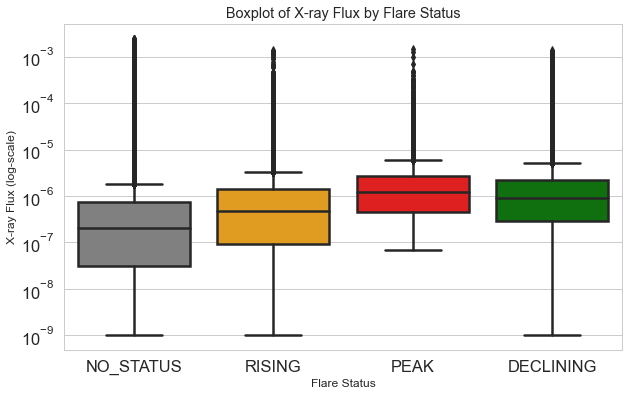
    <center><figcaption><b>Figure 3:</b> Flare Status: Significant overlap of this variable and high number of No Status made it unusable.</figcaption></center>
</figure>

Instead of using flare status, the x-ray flux values were used to label a new category called flare classification.  The classification system is primarily based on the peak flux (number of photons per square centimeter per second) of x-ray emissions with wavelengths ranging from 1 to 8 Angstroms [2].

<ul>
    <li><b>X-Class Flares:</b> The most intense flares with peak flux above 1 × 10<sup>-4</sup> W/m<sup>2</sup>. They can cause planet-wide radio blackouts and long-lasting radiation storms.</li>
    <li><b>M-Class Flares:</b> Medium-sized flares with peak flux between 1 × 10<sup>-5</sup> and 1 × 10<sup>-4</sup> W/m<sup>2</sup>. These flares can lead to brief radio blackouts affecting Earth's polar regions and minor radiation storms.</li>
    <li><b>C-Class Flares:</b> Small flares with peak flux between 1 × 10<sup>-6</sup> and 1 × 10<sup>-5</sup> W/m<sup>2</sup>. C-class flares are generally too weak to significantly affect Earth but can influence the space weather environment.</li>
    <li><b>B-Class Flares:</b> The weakest category with peak flux less than 1 × 10<sup>-6</sup> W/m<sup>2</sup>. These flares are not capable of causing any disturbances in Earth's magnetic field.</li>
</ul>

<br>
<figure>
    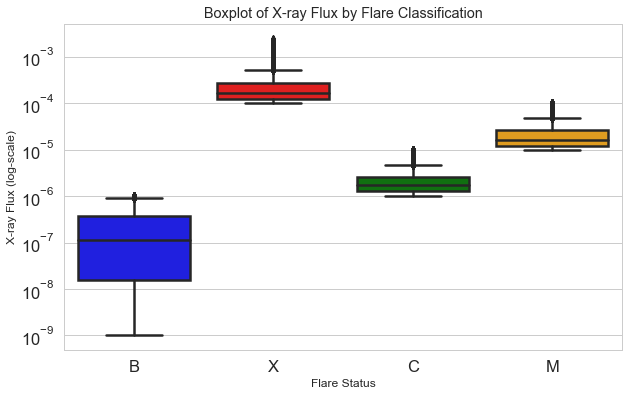
    <center><figcaption><b>Figure 3:</b> Flare Classification: X-ray Flux Relabeled based on Classification</figcaption></center>
</figure>

There was still some outliers but the overall categories separated using flare classification into distinct distributions.  Given the size of the dataset, resampling was done on multiple time granularities.  It was observed that just down-sampling and taking the mean x-ray value during the time window was insufficient as the classification label became convoluted with the x-ray flux value (Figure 4).

<br>
<figure>
    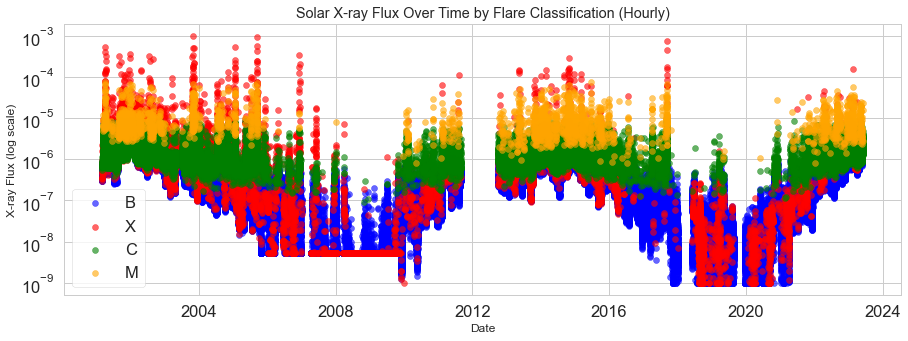
    <center><figcaption><b>Figure 4:</b> Down Sampling: Down Sampling using different time windows with resulting mismatch of flare classification.</figcaption></center>
</figure>

In order to address this a 97.5% quantile was selected for the samplings done and the flare classification was applied to the resulting x-ray flux value.  This approach helped by removing some of the outliers that were clearly present in the data.

<br>
<figure>
    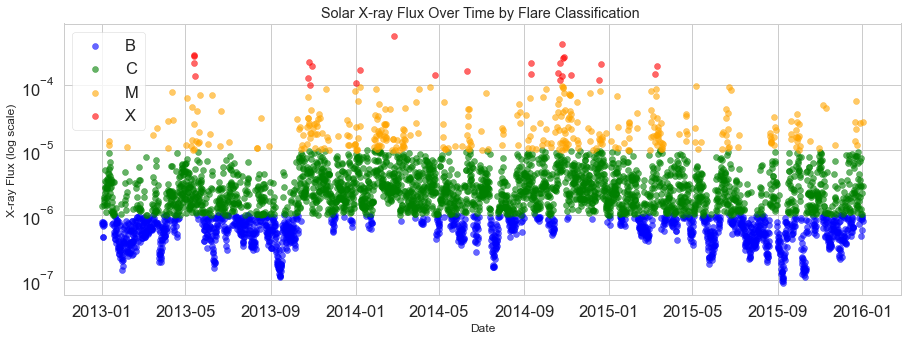
    <center><figcaption><b>Figure 4:</b> Down Sampling: Down Sampling using 97.5% Quantile and Relabeling X-ray Flux.</figcaption></center>
</figure>

The data was also also interpolated with a smooth fit across the entire window to address the gaps observed, like those from late 2011 to 2013.  Looking at the counts of flare classifications over the years, we noticed the 11 year seasonal cycle of solar activity (Figure 5) which seemed to indicate that this technique of downsampling did capture the overall behavior even on a resolution of down-sampling to yearly resolution.

<br>
<figure>
    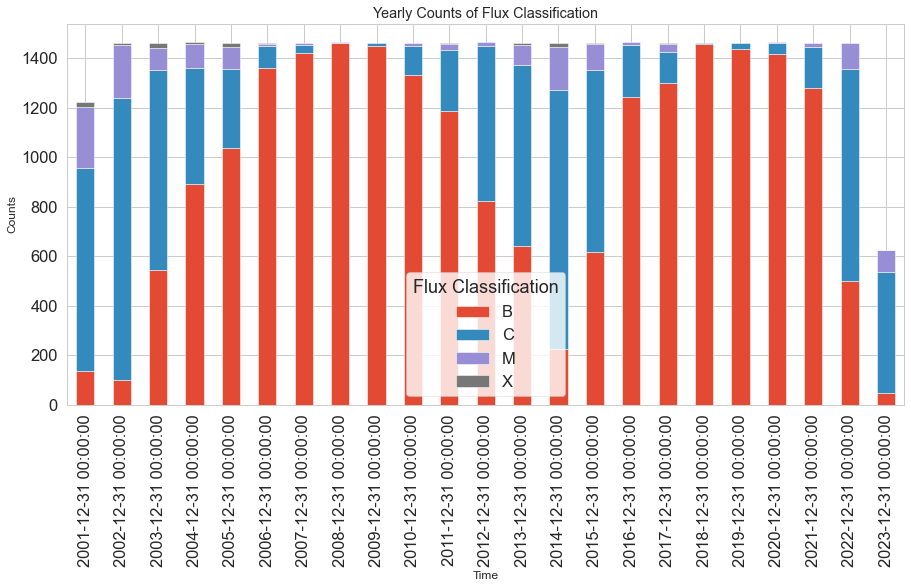
    <center><figcaption><b>Figure 5:</b> Flare Classification Count: 11 Year Seasonal Pattern.</figcaption></center>
</figure>

The dataset was partitioned into training and test at many different resolutions.  Given the apparent 11 year seasonality, the fine resolutions like 6 hours were very computational intensive.

<br>
<figure>
    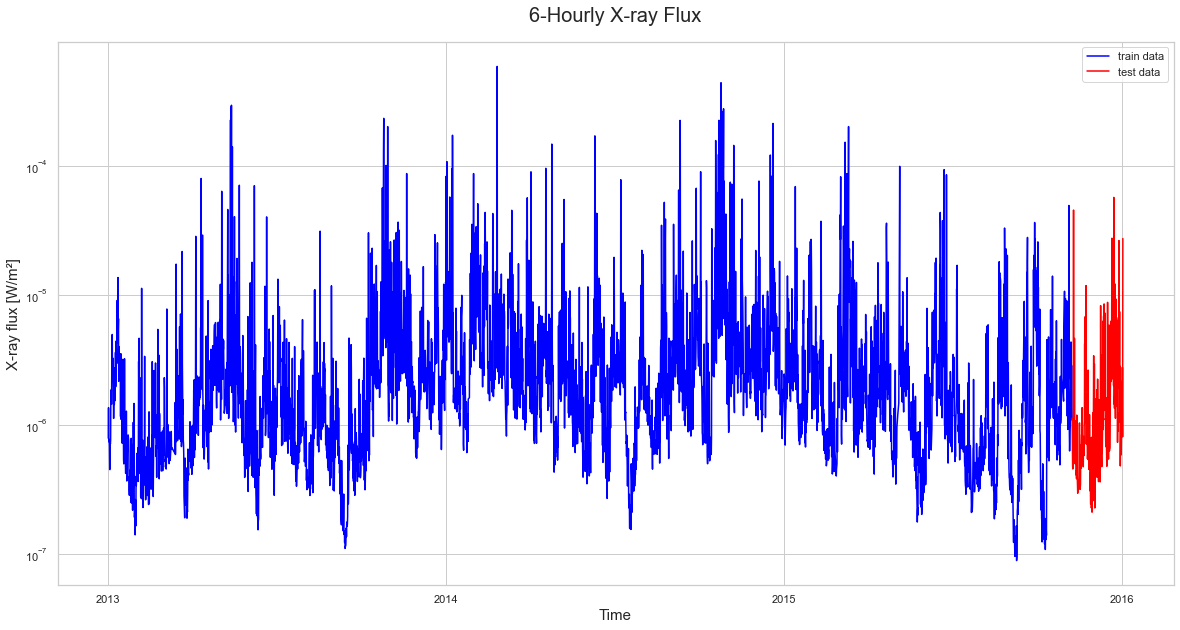
    <center><figcaption><b>Figure 6:</b> Train/Test Split: 6 Hourly Resolution - Unabridged Time Window:  2013-01-01 00:00:00 to 2015-11-07 18:00:00. </figcaption></center>
</figure>

For each of the time resolutions, the distribution of the x-ray flux was explored along with stationary tests performed on all training set windows.  Regardless of time window, it was observed that the distribution appeared to be leptokurtic, suggesting the presence of outliers or extreme values (Figure 7).  This motivated the idea to also use exponential smoothing and GARCH modeling.   

<br>
<figure>
    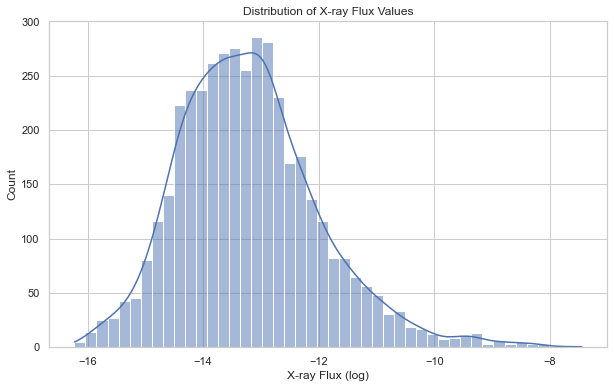
    <center><figcaption><b>Figure 7:</b> Distribution of X-ray Flux: 6 Hourly Resolution - Train Window.</figcaption></center>
</figure>

On small time resolutions, the data did not have any apparent seasonality (Figure 7).        

<br>
<figure>
    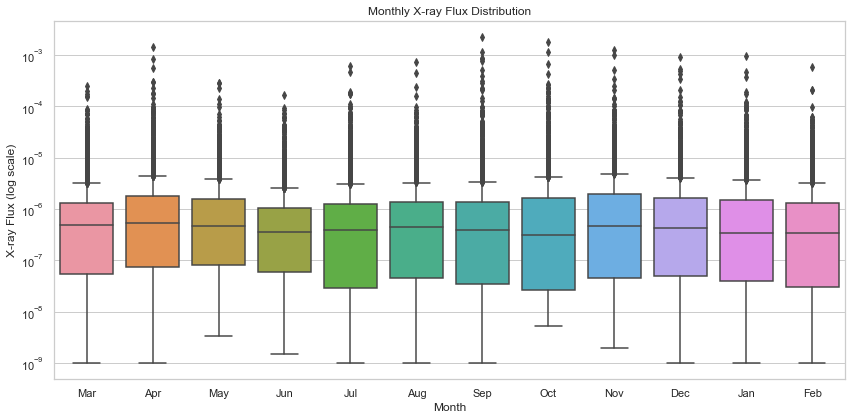
    <center><figcaption><b>Figure 8:</b> Monthly: 6 Hourly Resolution - No apparent seasonality. Significant presence of outliers..</figcaption></center>
</figure>

The ACF plot shows a gradually decreasing correlation with increasing lags, which suggests a slow decay and thus a non-stationary time series. The absence of a sharp cut-off in the ACF indicates that the underlying process is not a pure AR process and might require differencing to achieve stationarity.

The PACF plot exhibits a sharp cut-off after the first lag, followed by a few significant spikes at later lags. This pattern typically indicates an AR(1) component due to the significance of the first lag. The later significant lags could suggest seasonal effects or additional AR terms that could be considered when modeling.

Considering both the ACF and PACF plots for the x-ray flux data, an initial model choice was an ARIMA model with one order of differencing (to address potential non-stationarity), one AR term (as indicated by PACF), and potentially additional MA terms or seasonal components as suggested by the sporadic significant lags in both the ACF and PACF.  These will be discussed in the subsequent section.   However, the ADF test results contradicted this by indicating that the series is stationary with a $p$ value that is essentially zero. This result might be that the series has no unit root but the apparent trend or slow decay might be due to a deterministic trend like we observed with the 11 year cycle.

<br>
<figure>
    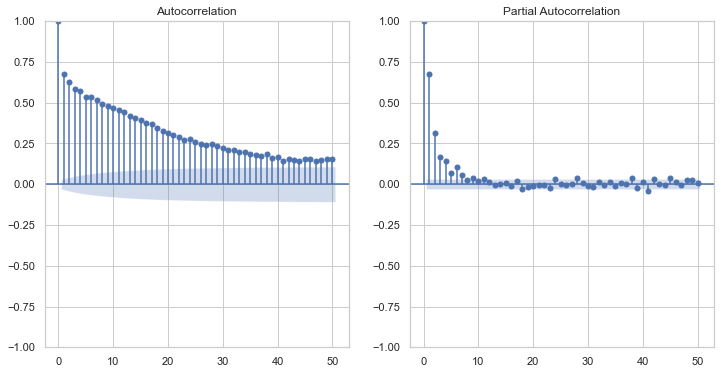
    <center><figcaption><b>Figure 9:</b> ACF/PACF Plots: 6 Hourly Resolution .</figcaption></center>
</figure>

<br>
<figure>
    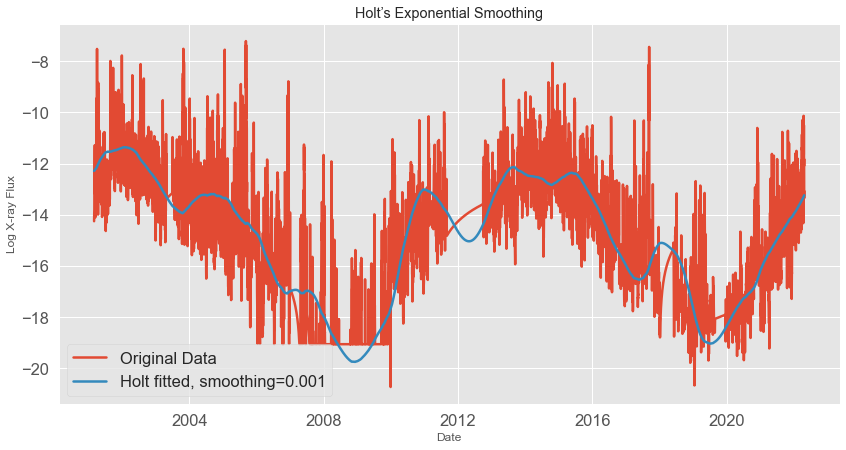
    <center><figcaption><b>Figure 10:</b> Holt Fitted Smoothing.</figcaption></center>
</figure>


#### V. Model Selection:

#### ARIMA (1,1,0) - 6 Hour Resolution:

We conducted a time series analysis on nearly two decades of solar X-ray flux data, which we first tried aggregated into six-hour intervals to construct an ARIMA(1, 1, 0) model. The data spanned from January 1, 2013, to November 7, 2015, with a total of 4164 observations. Our primary focus was to forecast future X-ray flux values and to assess the performance of the model over the given time window.

Upon examination of the residuals plot (Figure 12), we noted that the residuals of our ARIMA model did not display any evident non-random patterns and were generally centered around zero. This suggested that our model was capturing some of the information in the time series without leaving out any systematic structure.

The forecast performance plot showed alignment between the model's forecast and the actual test data. The forecast, represented in the plot as a green line with a shaded confidence interval, gave an average of the actual test data. Statistically, the model exhibited a negative coefficient for the autoregressive term at -0.4231 (p < 0.000), which indicated an inversely proportional relationship between the current value and its immediately preceding value. The model's log likelihood, Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC) were -5451.781, 10907.562, 10920.230, and 10912.043, respectively. 

Overall, looking at the diagnostic tests showed a mixed outcome for this model. The Ljung-Box test yielded a p-value of 0.00, suggesting that some autocorrelation might remain in the residuals. The Jarque-Bera test agreed with this, with its p-value also at 0.00, indicating that the residuals did not follow a normal distribution.  It should be noted that we already noticed a non-normal distribution in the data during the EDA. However, the heteroskedasticity test, with a p-value greater than 0.05, confirmed the absence of conditional heteroskedasticity.

The skewness of the residual distribution was measured at 0.53, which demonstrated asymmetry. The kurtosis, measured at 5.69, was indicative of a leptokurtic distribution which we also had observed during the EDA.

The forecast accuracy metrics, including the Mean Absolute Error (MAE) of 1.0607, Mean Squared Error (MSE) of 1.5056, Root Mean Squared Error (RMSE) of 1.2270, and Mean Absolute Percentage Error (MAPE) of 7.81% showed that the model provided a relatively accurate forecast of the solar X-ray flux but was rather naive and didn't capture the full dynamics or overall trend.

<figure>
    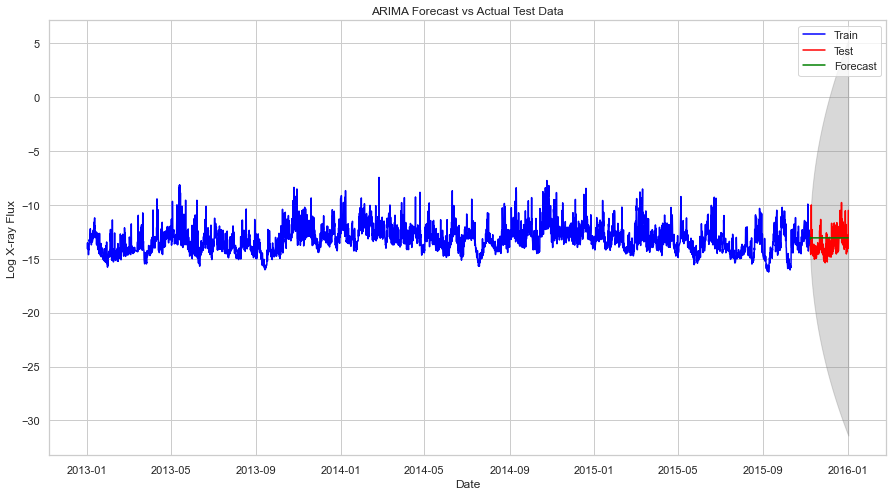
    <center><figcaption><b>Figure 11:</b> ARIMA (1,1,0) Model </figcaption></center>
</figure>

<figure>
    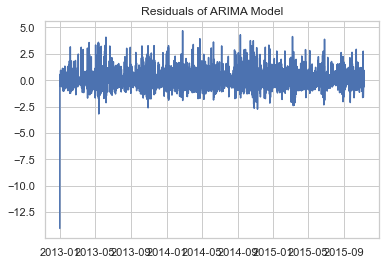
    <center><figcaption><b>Figure 12:</b> ARIMA (1,1,0) Model Residuals </figcaption></center>
</figure>

#### ARIMA(2,1,3) - 6 Hour Resolution:

Next, we implemented an automated ARIMA model selection process. This stepwise approach was employed to minimize the Akaike Information Criterion (AIC) value.  The stepwise algorithm iteratively explored various combinations of AR, integration, and MA components, both with and without an intercept term. The model permutations considered ranged from a simple ARIMA(0,1,0) to more complex ARIMA(2,1,3) structures.

The optimal model determined by the algorithm was the ARIMA(1,1,2) without an intercept term, registering an AIC of 10336.323.  Upon fitting this model to the dataset, the log likelihood was found to be -5164.161. The coefficients for the AR and MA terms were statistically significant, with p-values well below the 0.05 threshold. 

The Ljung-Box test yielded a p-value of 1.00, which suggested no significant autocorrelation in the residuals at lag 1, and thus no information left in the residuals that could further improve the model. The Jarque-Bera test reported a p-value of 0.00 again indicating that the distribution of residuals did not follow a normal distribution.

The error metrics provided further insight into the model's predictive capabilities. The MAE was reduced to 1.0229, the MSE to 1.4252, the RMSE to 1.1938, and the MAPE was slightly improved to 7.56%. These improvements in forecast accuracy, although modest, are significant in the context of solar X-ray flux prediction.

In light of these results, the ARIMA(1,1,2) model is slightly better but it still does not capture the overall trends in the forecast and appears to be a rather mean value forecast. The reduction in AIC and the improved error metrics relative to the initial ARIMA(1, 1, 0) model justify its selection though. The model's diagnostics suggest that while the residuals may not be perfectly normally distributed, the model captures some of the dynamics of the time series. 

#### SARIMA - 6 Hour Resolution/ Daily And Weekly Seasonality:

Extending the analysis to account for potential seasonal effects, we fitted a SARIMA model with a seasonality component of one day and one week to the solar X-ray flux data.  The diagnostics of the SARIMA model included a set of plots: the standardized residual plot, the histogram plus estimated density plot, the Normal Q-Q plot, and the correlogram.

The standardized residual plot did not exhibit any discernible patterns, suggesting that the model residuals are random. However, some outliers are visible.  The histogram of the residuals were approximately normally distributed, albeit with some deviation from normality as seen by the slight skewness. This is also reflected in the Normal Q-Q plot, where the points deviate from the line in the tails.  The autocorrelation function plot showed that the residuals were not autocorrelated, with all lagged values within the confidence interval. This implies that the model is capturing the time-dependent structure of the data well. But given the resolution it again failed to capture the overall trend.

The error metrics for the SARIMA model with daily seasonality are as follows:

<ul>
    <li> Mean Absolute Error (MAE): 1.0691 </li>
    <li> Mean Squared Error (MSE): 1.5195 </li>
    <li> Root Mean Squared Error (RMSE): 1.2327 </li>
    <li> Mean Absolute Percentage Error (MAPE): 7.86%</li>
    </ul>
    
These metrics are slightly higher than those observed in the ARIMA(1,1,2) model, suggesting a marginal decrease in predictive accuracy. So, while the SARIMA model with a seasonality of one day provides a reasonable fit to the historical solar X-ray flux data in the short term, the slight deterioration in the error metrics as compared to the non-seasonal ARIMA model suggested that further investigation into the appropriate seasonal structure was warranted. Similar results occurred for the weekly seasonality.  This presented the challenge of being able to explore large seasonality but also required a trade-off due to the computational complexities.  As a result, the 6 hour time resolution was left and the modeling was done with 1 day resolutions.

<figure>
    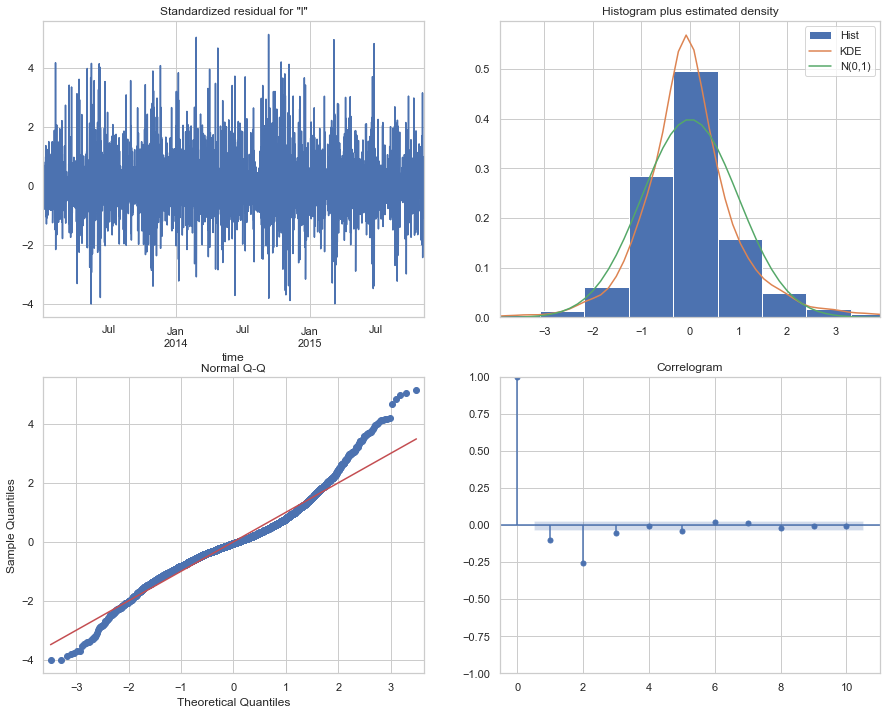
    <center><figcaption><b>Figure 12:</b> SARIMA Model Residuals </figcaption></center>
</figure>

<figure>
    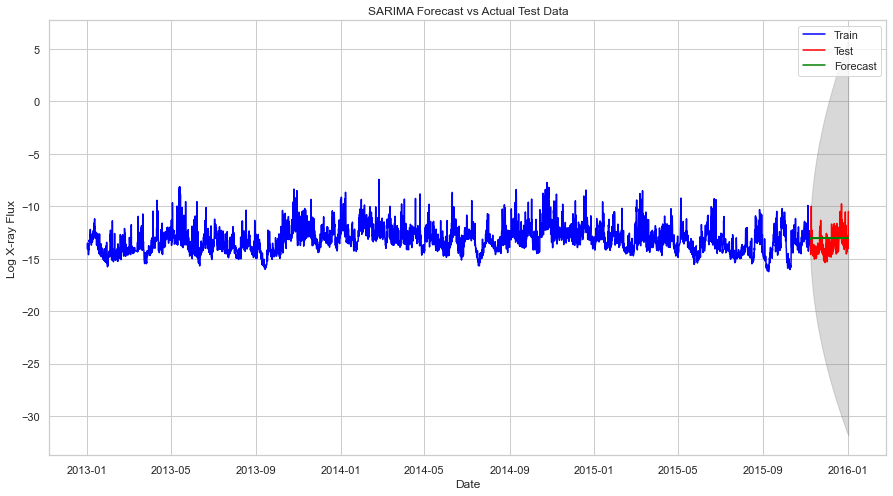
    <center><figcaption><b>Figure 13:</b> SARIMA Model Daily Seasonality Forecast</figcaption></center>
</figure>

#### ARIMA (GARCH and Smoothing Models)

This model is particularly suited for time series that exhibit volatility clustering which we have observed with the X-ray flux solar data.  We tried to fit a volatility model specified as a GARCH(1,1) process, which is a common specification that captures the autoregressive nature of volatility. The estimated parameters from the GARCH model included: $\mu$, $\omega$, alpha[1], and beta[1].  We observed that the constant mean of the model to be 0.0218. This is the average value around which the series fluctuates. We could try to transform the data using a Box-Cox transformation to ensure normality but the modeling approaches we have explored did not require normality as an assumption for application. The $\omega$ coefficient is positive and it is not statistically significant (p > 0.05), indicating that it may not be a reliable predictor of the unconditional variance of the series.  For alpha[1], the coefficient of 0.0741 is significant (p < 0.05), suggesting that past shocks have a modest impact on current volatility.  The beta[1] parameter captures the persistence of volatility, or how much the previous period's conditional variance influences the current period's variance. The estimated value of 0.9259 is highly significant (p < 0.001), indicating a high level of persistence in volatility. This means that when there is a disturbance in volatility, it tends to persist over time.

The model's optimization process completed successfully after 27 iterations, with the final negative log-likelihood function value at 9224.875. The relatively low number of iterations and the successful termination suggested that the optimization algorithm efficiently found a parameter set that adequately fits the data.  Overall, this model did not capture the upward trend of the x-ray flux better than the ARIMA and SARIMA model.  There was not significant improvement.

<figure>
    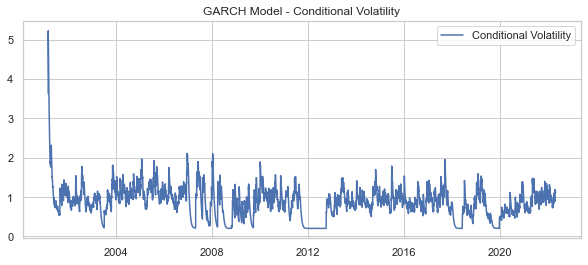
    <center><figcaption><b>Figure 14:</b> GARCH Volatility: Daily Resolution </figcaption></center>
</figure>

We also tried an application of Holt’s Exponential Smoothing. This method extends Exponential Smoothing to capture trends in the data. The trend component was additive, implying a linear change in the series level over time.

The ExponentialSmoothing function from the statsmodels library was initialized with the training data. A smoothing level of 0.001 was ultimately selected, for a strong dampening effect. This can be advantageous when the series is expected to have a long-term trend with short-term volatility that should not heavily influence the forecast.

Following the application of Holt's Exponential Smoothing, an autoARIMA model was used and an order of (3, 2, 3) was fitted.  At 7.39%, the MAPE wa a slight improvement.  The model did capture the overall upward trend better than the other explored models but it did not capture the overall trend and extending the forecast window out shows that it just continues to grow.

<figure>
    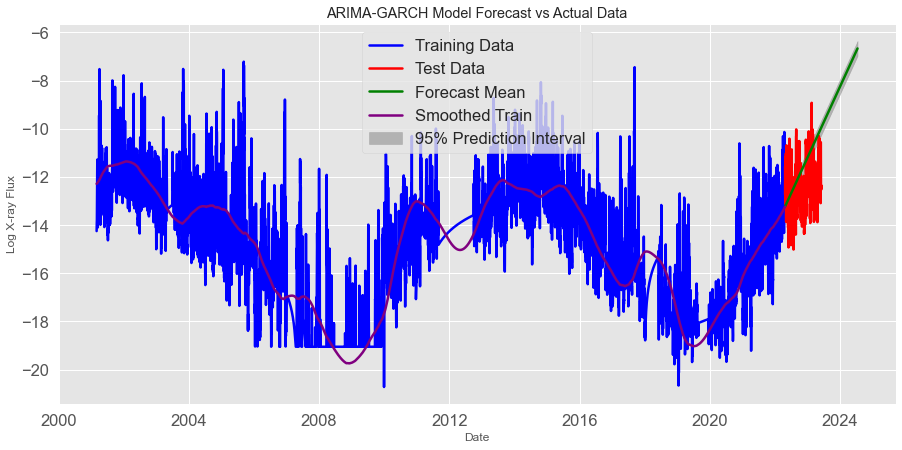
    <center><figcaption><b>Figure 15:</b> Daily Resolution: ARIMA Model w Holt Smoothing Fit </figcaption></center>
</figure>

#### SARIMA with Fourier Features

In the previous models, it was clear that the 11-year seasonality was not captured.  Next, we sought to model the long-term cyclical behavior of solar X-ray flux data, accounting for the 11-year solar activity cycle. Given the size of the dataset, it became necessary to again decrease the resolution to monthly and try to find more efficient ways of handling the data. To this end, we applied a SARIMA model augmented with Fourier terms to capture the complex seasonal patterns associated with solar phenomena.

The FourierFeaturizer was employed to generate trigonometric terms that encapsulate the periodicity of the 11-year solar cycle in monthly data. These Fourier terms were then included as exogenous variables in the SARIMAX model, with the non-seasonal ARIMA component.

The resulting model's standardized residual plot did not reveal any obvious patterns but it should be noted that residuals appeared to be contained within a narrower band.

The histogram of standardized residuals, compared against a Normal(0,1) distribution, showed a pronounced peak around the mean but with lighter tails.  The correlogram for the residuals showed that autocorrelations for all lags were within the confidence band, suggesting that the model adequately captured the time series' autocorrelation structure.  So, this was definitely an improved model.

The plot of the forecast against the test data revealed the model’s capability to follow the general trend of the test data. While there was some divergence between forecast and actual values, the model succeeded in tracking the direction and magnitude of changes in solar X-ray flux unlike the previous models.

However, the error metrics suggested that the model's predictive performance was suboptimal. The MAE was relatively high at 2.1428. The MAPE was 17.66% which was significantly higher but we did see the model following the general patterns of the X-ray flux more closely with past bobservations., which is considerable and may indicate that the model’s forecast was on average off by this percentage from the actual observations.

<br>
<figure>
    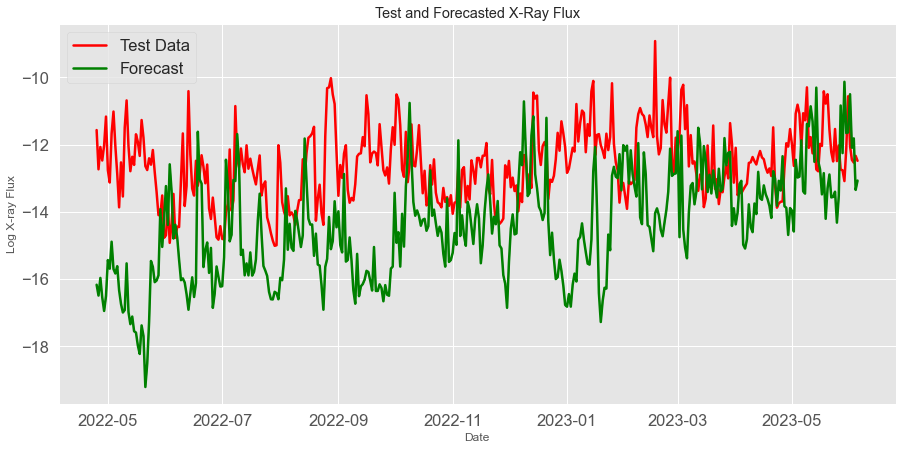
    <center><figcaption><b>Figure 16:</b> Monthly Resolution: SARIMA Model w Fourier Features Fit </figcaption></center>
</figure>


#### VI. Results:

Our comprehensive analysis of solar X-ray flux data employed a variety of time series modeling techniques to forecast future values and assess model performance over a multi-year window. Throughout the various models, we observed a recurring theme of models capturing the central tendency of the data but struggling with long-term trends and complex seasonal patterns. The integration of Fourier features to capture the 11-year solar cycle marked a significant improvement in model performance, aligning better with observed patterns despite higher error metrics.

Our findings underscore the complexity of solar X-ray flux forecasting, highlighting the trade-offs between model complexity, computational efficiency, and predictive accuracy. Future research directions may include the integration of additional data sources like sunspot counts (Figure 17, 18).

<table>
    <tr>
        <th>Model Description</th>
        <th>Resolution</th>
        <th>MAE</th>
        <th>MSE</th>
        <th>RMSE</th>
        <th>MAPE</th>
    </tr>
    <tr>
        <td>ARIMA (1,1,0)</td>
        <td>6-Hour</td>
        <td>1.0607</td>
        <td>1.5056</td>
        <td>1.2270</td>
        <td>7.81%</td>
    </tr>
    <tr>
        <td>AutoARIMA (1,1,2)</td>
        <td>6-Hour</td>
        <td>1.0229</td>
        <td>1.4252</td>
        <td>1.1938</td>
        <td>7.56%</td>
    </tr>
    <tr>
        <td>SARIMA (Daily Seasonality)</td>
        <td>6-Hour</td>
        <td>1.0691</td>
        <td>1.5195</td>
        <td>1.2327</td>
        <td>7.86%</td>
    </tr>
    <tr>
        <td>ARIMA with Holt’s Smoothing</td>
        <td>Daily</td>
        <td>0.8899</td>
        <td>1.2425</td>
        <td>1.1147</td>
        <td>7.39%</td>
    </tr>
    <tr>
        <td>SARIMA with Fourier Features</td>
        <td>Monthly</td>
        <td>2.1428</td>
        <td>6.7466</td>
        <td>2.5974</td>
        <td>17.66%</td>
    </tr>
</table>

One of the issues with the SARIMA with Fourier Features models is that it consistently under-estimates the X-ray flux.  We see this in the flare classification counts which only predicts the lowest flare classification.

<br>
<figure>
    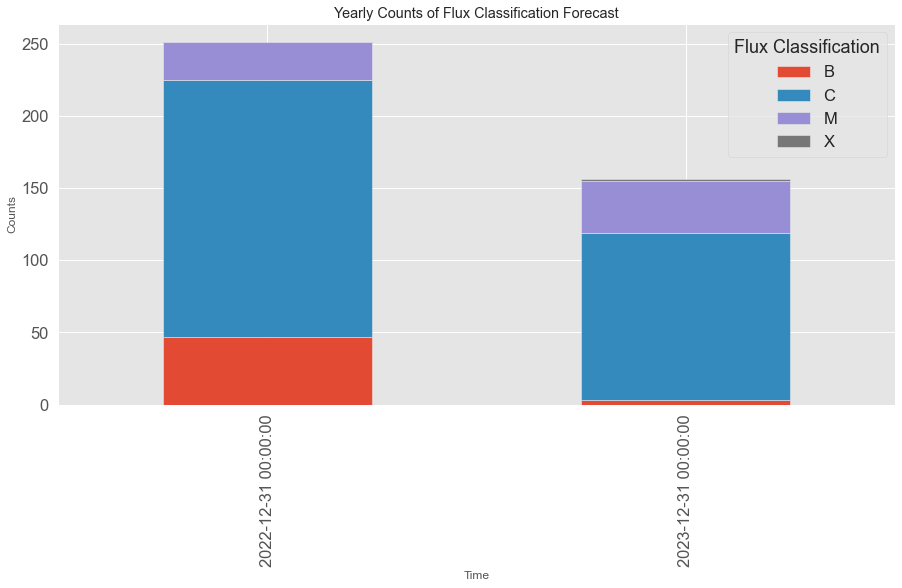
    <center><figcaption><b>Figure 17:</b> Flare Classification Counts in Test Set </figcaption></center>
</figure>

<br>
<figure>
    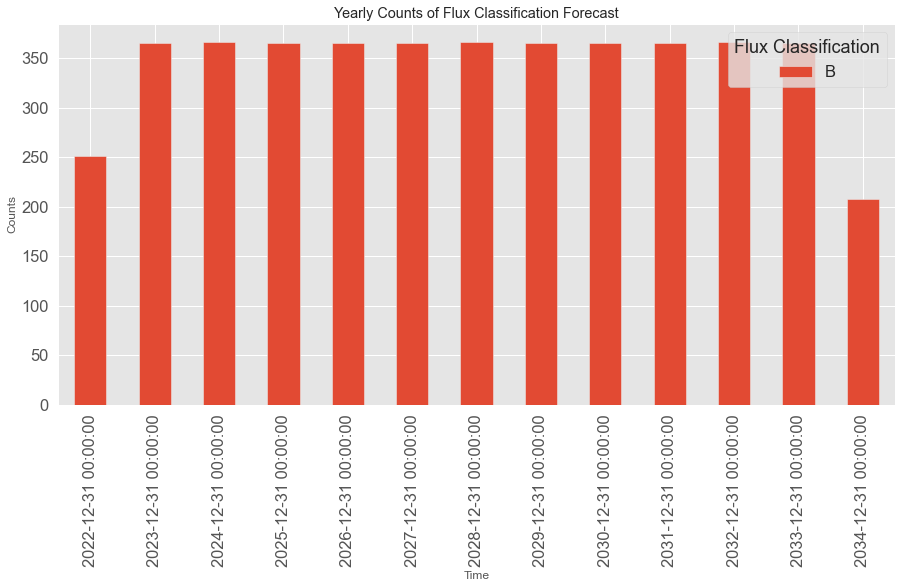
    <center><figcaption><b>Figure 18:</b> Flare Classification Counts in SARMIA Fourier Forecast Set </figcaption></center>
</figure>

#### VII. References:

[1] Zinke, L. Halloween-like solar storm impacts. Nat Rev Earth Environ 4, 735 (2023). https://doi.org/10.1038/s43017-023-00496-9 

[2] SpaceWeather.com. (n.d.). The Classification of X-ray Solar Flares. Retrieved [23 November 2023], from https://spaceweather.com/glossary/flareclasses.html

#### VII. Full Code Reference:


#### Python Libraries:

In an attempt to predict solar flares using x-ray flux data, we have utilized a suite of Python libraries, each serving a specific role in the data analysis and modeling process. Pandas and NumPy helped with facilitating data manipulation and numerical computations. These libraries were important in handling our large dataset, which contained over 11 million data points, enabling efficient data processing and transformation.

For managing and interpreting the time-based elements of our dataset, the datetime library is important. It allows us to work with time-series data effectively.

Visualization plays a key role in our EDA and in presenting our findings. We leverage Matplotlib and Seaborn. Our project also involves sophisticated statistical and machine learning techniques for which we employ various components of the Scikit-learn library. Specifically, we use its metrics module to evaluate the performance of our predictive models. Tools like mean_squared_error and mean_absolute_error are used for assessing the accuracy and reliability of our forecasts.

We delve into advanced time series analysis and forecasting methods, utilizing libraries like statsmodels and pmdarima. For instance, the auto_arima function from pmdarima helps in identifying optimal parameters for ARIMA models, while statsmodels is used for implementing seasonal decomposition, ACF, and PACF plots, providing deeper insights into the data's temporal structure.

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.preprocessing import FourierFeaturizer

In [95]:
import statsmodels.api as sm
from scipy import stats
from scipy.special import inv_boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from pmdarima import auto_arima
from arch import arch_model
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
# Set default plotting style
sns.set_style("whitegrid", {'grid.color': '.9', 'figsize' : '(16,8)'})      # setting a default figure size and clean white aspect 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5}, )  # useful for plot visualisation when running in Jupyter Notebooks
%matplotlib inline  
plt.style.use('ggplot')

#### Exploratory Data Analysis

We will start with reading in the data.  Since x-ray flux is the only dependent variable in the model, we will check to see how complete it is along with the categorical variable of solar flare.

In [6]:
df = pd.read_csv("combined_data.csv", index_col=0, dtype={"xray_flux": np.float32, "flare_status": "string"}, parse_dates=True)

In [7]:
df.head()
print("Number of observations: ", len(df))

Number of observations:  11710080


In [8]:
# Statistics for X-ray Flux:
basic_stats = df['xray_flux'].describe()
# Missing values for each column
missing_values = df.isnull().sum()
# Checking data types of each column
data_types = df.dtypes
# Displaying the results
print("Basic Statistics for 'xray_flux':\n", basic_stats)
print("\nMissing Values Count:\n", missing_values)
print("\nData Types of Each Column:\n", data_types)

Basic Statistics for 'xray_flux':
 count    9.999239e+06
mean     9.218210e-07
std      8.949456e-06
min      1.000000e-09
25%      3.342829e-08
50%      2.229048e-07
75%      7.995654e-07
max      2.435374e-03
Name: xray_flux, dtype: float64

Missing Values Count:
 xray_flux        1710841
flare_status    11049397
dtype: int64

Data Types of Each Column:
 xray_flux       float32
flare_status     string
dtype: object


In solar physics, even small changes in x-ray flux can be significant. They can indicate various solar phenomena, such as the emergence of new sunspots, solar flares, or changes in the sun's magnetic field. The x-ray flux values, especially when they are on the higher end of the scale, are indicators of solar events that could potentially impact Earth's space environment.

Analyzing the dataset reveals some key insights into the nature and quality of the data collected for x-ray flux and flare status. The x-ray flux, consists of approximately 10 million entries of solar activity. The average x-ray flux, measured at around $9.22×10^{−7}$, along with a relatively high standard deviation, suggests variability in solar activity, which is typical given the dynamic nature of the sun. The wide range between the minimum and maximum values of x-ray flux also points to periods of both low and very high solar activities.

However, the dataset is not without its difficulties. A significant number of missing values in both x-ray flux and flare status columns—over 1.7 million in X-ray flux and 11 million in flare status—pose a challenge. These gaps could impact the analysis and model accuracy, necessitating careful consideration in terms of data imputation or handling techniques. Understanding these aspects of the dataset is important for further analysis and for the development of predictive models for solar flare activity.

In [9]:
# Verifying Timeframe
min_date = df.index.min()
max_date = df.index.max()
# Calculate the difference in years
time_span_years = (max_date - min_date).days / 365.25
print(min_date)
print(max_date)
print(time_span_years)

2001-03-01 00:00:00
2023-06-05 23:59:00
22.261464750171115


In [10]:
# Inspecting "flare_status" column
print(f'Unique values on "flare_status" column: {list(df["flare_status"].unique())}')
print(f'% of NaN/NO_STATUS on the "flare_status" column: {(df["flare_status"].isna().mean() + (df["flare_status"] == "NO_STATUS").mean()):.4f}')

Unique values on "flare_status" column: [<NA>, 'RISING', 'PEAK', 'DECLINING', 'NO_STATUS']
% of NaN/NO_STATUS on the "flare_status" column: 0.9461


In [11]:
df['flare_status'].fillna('NO_STATUS', inplace=True)

The "flare_status" column in the dataset is useful in understanding the dynamics of solar flares, as it categorizes the stages and occurrences of these solar events. This column has a set of distinct categories: 'RISING', 'PEAK', 'DECLINING', and 'NO_STATUS', along with missing values represented by <NA>. These categories represent different phases of a solar flare's lifecycle, with 'RISING' indicating the build-up phase, 'PEAK' signifying the maximum intensity, and 'DECLINING' marking the diminishing phase. 'NO_STATUS' could imply periods of normal solar activity without notable flares or insufficient data to classify the status. A significant observation is that a substantial portion of the dataset, approximately 94.61%, comprises 'NO_STATUS'. This high percentage highlights that most of the time, the sun is in a relatively quiescent state, which is consistent with the nature of solar flares as relatively infrequent, though impactful, events. Understanding and accurately categorizing these statuses is crucial for any analysis aimed at predicting solar flare occurrences, as it provides direct insights into the solar activity phases and their potential impacts.

In [12]:
df.describe()

xray_flux
count  9.999239e+06
mean   9.218210e-07
std    8.949456e-06
min    1.000000e-09
25%    3.342829e-08
50%    2.229048e-07
75%    7.995654e-07
max    2.435374e-03

In [13]:
# Grouping the DataFrame by 'flare_status' and calculating various statistics for 'x-ray_flux'
stats_by_status = df.groupby('flare_status')['xray_flux'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Displaying the statistics
print(stats_by_status)

                      mean        median       std           min       max  \
flare_status                                                                 
DECLINING     2.951514e-06  8.936852e-07  0.000016  1.000000e-09  0.001375   
NO_STATUS     8.548631e-07  2.044646e-07  0.000009  1.000000e-09  0.002435   
PEAK          3.541422e-06  1.190479e-06  0.000020  6.761309e-08  0.001466   
RISING        1.677777e-06  4.677322e-07  0.000011  1.000000e-09  0.001418   

                count  
flare_status           
DECLINING      251630  
NO_STATUS     9389846  
PEAK            24619  
RISING         333144  


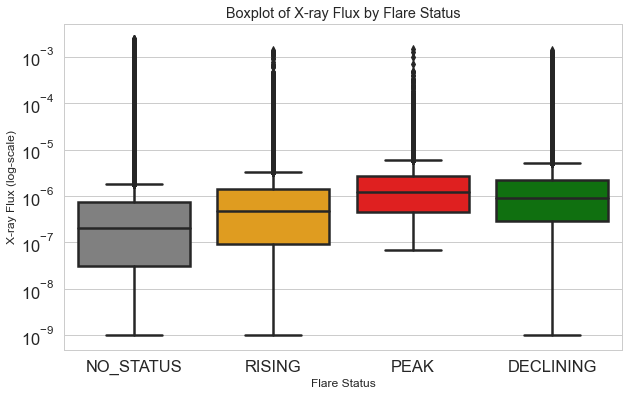

In [14]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
colors = {'NO_STATUS': 'grey', 'RISING': 'orange', 'PEAK': 'red', 'DECLINING': 'green'}
# Create a figure for the boxplot
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='flare_status', y='xray_flux', data=df, palette=colors)

# Set title and labels
plt.title('Boxplot of X-ray Flux by Flare Status')
plt.xlabel('Flare Status')
plt.ylabel('X-ray Flux (log-scale)')
plt.yscale('log')

# Show the plot
plt.show()

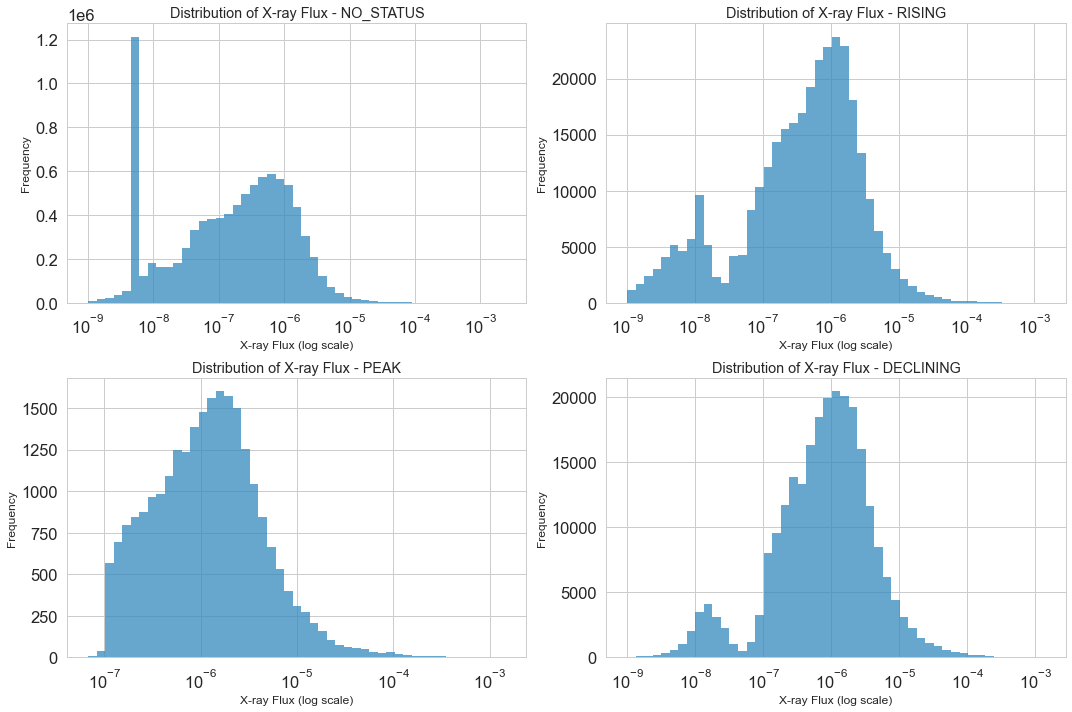

In [15]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# List of unique flare statuses
statuses = df['flare_status'].unique()

# Create a distribution plot for each flare status using a logarithmic scale
for ax, status in zip(axes, statuses):
    subset = df[df['flare_status'] == status]
    
    # Since x-ray_flux values are small, we use logarithmic bins
    bins = np.logspace(np.log10(subset['xray_flux'].min()), np.log10(subset['xray_flux'].max()), 50)
    sns.histplot(subset['xray_flux'], bins=bins, kde=False, ax=ax)
    ax.set_xscale('log')  # Set x-axis to logarithmic scale
    ax.set_title(f'Distribution of X-ray Flux - {status}')
    ax.set_xlabel('X-ray Flux (log scale)')
    ax.set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

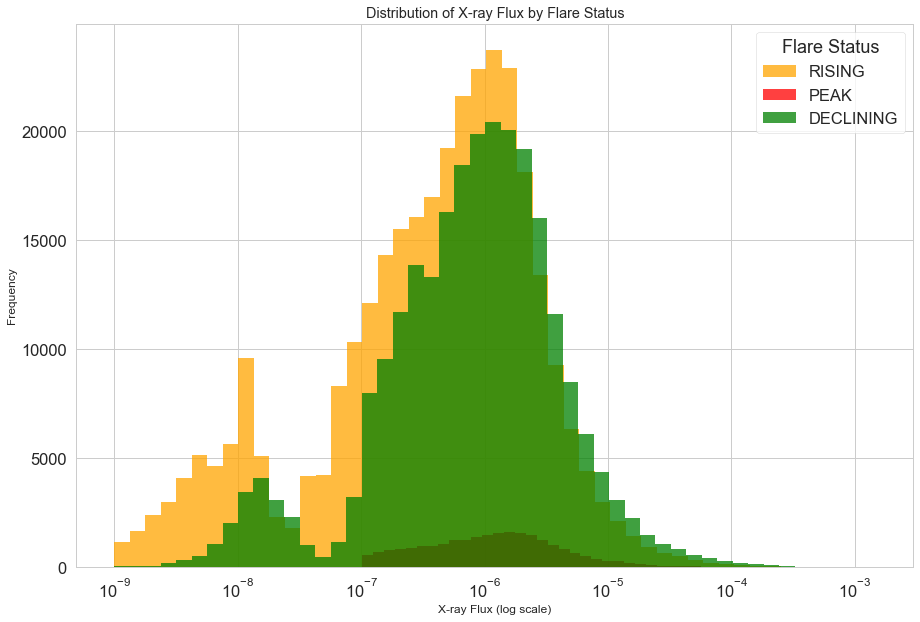

In [16]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure for the single plot
fig, ax = plt.subplots(figsize=(15, 10))

# Define colors for each status
colors = {'NO_STATUS': 'grey', 'RISING': 'orange', 'PEAK': 'red', 'DECLINING': 'green'}

# List of unique flare statuses
statuses = ['RISING', 'PEAK', 'DECLINING']

# Create a distribution plot for each flare status using a logarithmic scale
for status in statuses:
    subset = df[df['flare_status'] == status]
    
    # Since x-ray_flux values are small, we use logarithmic bins
    bins = np.logspace(np.log10(subset['xray_flux'].min()), np.log10(subset['xray_flux'].max()), 50)
    sns.histplot(subset['xray_flux'], bins=bins, kde=False, color=colors[status], label=status)

# Set the x-axis to logarithmic scale
ax.set_xscale('log')

# Set title and labels
ax.set_title('Distribution of X-ray Flux by Flare Status')
ax.set_xlabel('X-ray Flux (log scale)')
ax.set_ylabel('Frequency')

# Add legend to differentiate the statuses
ax.legend(title='Flare Status')

# Show the plot
plt.show()

In [17]:
# Function to perform the Dickey-Fuller test
def check_stationarity(timeseries, maxlag=None, regression='c', autolag='AIC'):
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, maxlag=maxlag, regression=regression, autolag=autolag)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critial Values [{key}]: {value}')

In [18]:
def plot_helper(df, desc):# Create a color mapping for different statuses
    colors = {'RISING': 'orange', 'PEAK': 'red', 'DECLINING': 'green', 'NO_STATUS': 'gray'}

    # Initialize a plot with log scale for y-axis
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_yscale('log')

    # Plot each status in the loop
    for status in df['flare_status'].unique():
        # Filter the DataFrame for the current status
        subset = df[df['flare_status'] == status]
    
       # Scatter plot the data
        ax.scatter(subset.index, subset['xray_flux'], color=colors[status], label=status, alpha=0.6)


    # Add labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('X-ray Flux (log scale)')
    ax.set_title('Solar X-ray Flux Over Time by Flare Status' + ' '+ desc)
    ax.legend()

    # Show the plot
    plt.show()

C:\Users\dwtro\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


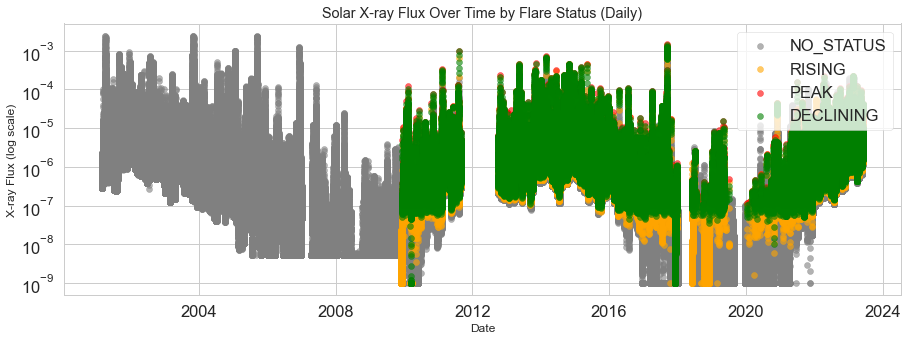

In [19]:
plot_helper(df, '(Daily)')

In [20]:
# Finding the first entry that does not have 'NO_STATUS'
first_non_no_status = df[df['flare_status'] != 'NO_STATUS'].iloc[0]
first_non_no_status

xray_flux          0.0
flare_status    RISING
Name: 2009-12-01 00:01:00, dtype: object

In [21]:
# The specified start time index where the status changes
start_time_index = "2009-12-01 00:01:00"

# Filtering the dataset to start from the specified time index
filtered_df = df[df.index >= pd.to_datetime(start_time_index)]

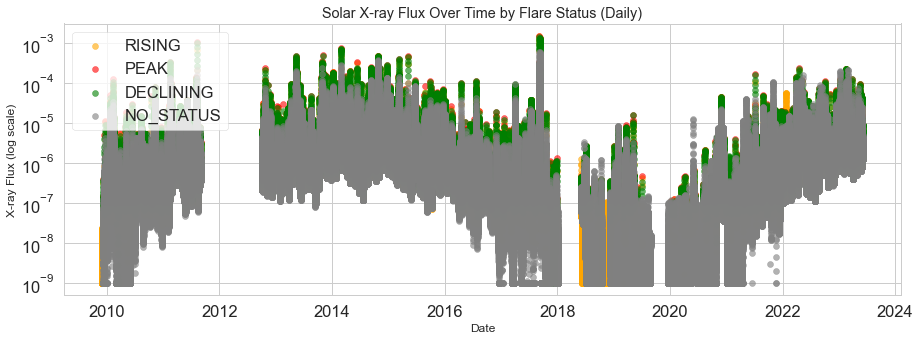

In [22]:
plot_helper(filtered_df, '(Daily)')

In [23]:
filtered_df

xray_flux flare_status
time                                          
2009-12-01 00:01:00  1.000000e-09       RISING
2009-12-01 00:02:00  1.000000e-09       RISING
2009-12-01 00:03:00  1.000000e-09       RISING
2009-12-01 00:04:00  1.000000e-09       RISING
2009-12-01 00:05:00  1.000000e-09       RISING
...                           ...          ...
2023-06-05 23:55:00  1.385846e-06    NO_STATUS
2023-06-05 23:56:00  1.439124e-06    NO_STATUS
2023-06-05 23:57:00  1.573129e-06    NO_STATUS
2023-06-05 23:58:00  1.570350e-06    NO_STATUS
2023-06-05 23:59:00  1.580912e-06    NO_STATUS

[7106399 rows x 2 columns]

In [24]:
status_mapping = {'NO_STATUS': 0, 'DECLINING': 1, 'RISING': 2, 'PEAK': 3}
filtered_df['status_numeric'] = filtered_df['flare_status'].map(status_mapping)

def custom_resample(group):
    xray_flux_mean = group['xray_flux'].mean()
    flare_status_max = group['flare_status'].max()
    
    return pd.Series({
        'xray_flux': xray_flux_mean,
        'flare_status': flare_status_max
    })

# Applying custom resample for different frequencies
df_hourly = filtered_df.resample('H').apply(custom_resample)
df_daily = filtered_df.resample('D').apply(custom_resample)
df_weekly = filtered_df.resample('W').apply(custom_resample)
df_monthly = filtered_df.resample('M').apply(custom_resample)
df_yearly = filtered_df.resample('A-DEC').apply(custom_resample)

C:\Users\dwtro\AppData\Local\Temp\ipykernel_33840\3622140380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['status_numeric'] = filtered_df['flare_status'].map(status_mapping)


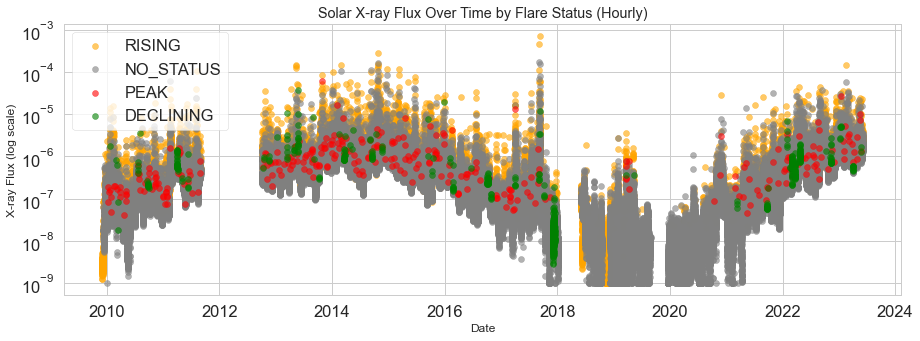

In [25]:
plot_helper(df_hourly,'(Hourly)')

In [26]:
# Inspecting "flare_status" column
print(f'Unique values on "flare_status" column: {list(df_hourly["flare_status"].unique())}')
print(f'% of NO_STATUS on the "flare_status" column: {((df_hourly["flare_status"] == "NO_STATUS").mean()):.4f}')

Unique values on "flare_status" column: ['RISING', 'NO_STATUS', 'PEAK', 'DECLINING']
% of NO_STATUS on the "flare_status" column: 0.7838


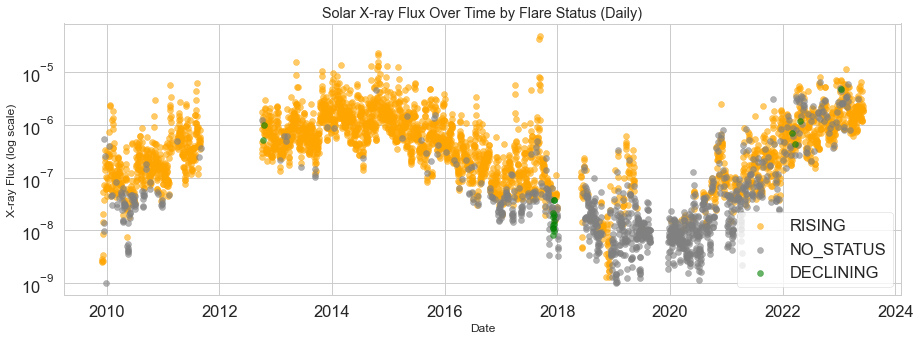

In [27]:
plot_helper(df_daily,'(Daily)')

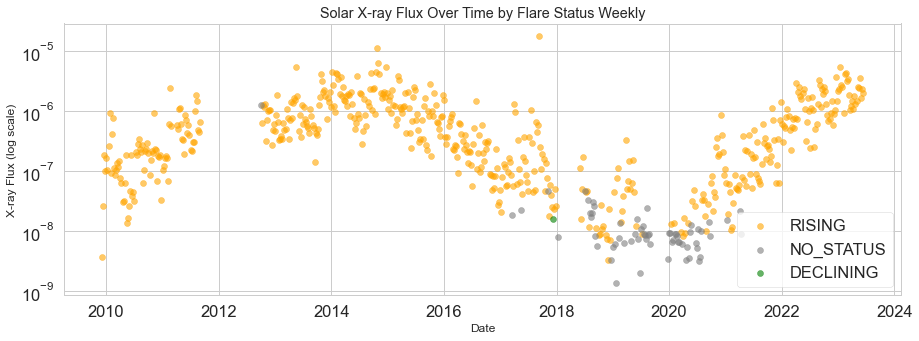

In [28]:
plot_helper(df_weekly, 'Weekly')

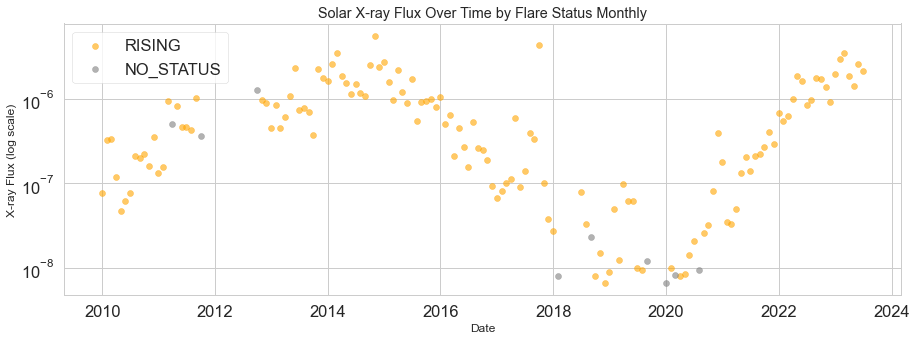

In [29]:
plot_helper(df_monthly, 'Monthly')

In [30]:
# Counting the number of missing values in the 'x-ray_flux' column
missing_values_count = df_hourly['xray_flux'].isna().sum()

# Print the count of missing values
print(f"Number of hourly observations: {len(df_hourly)}")
print(f"Number of missing values in 'x-ray_flux': {missing_values_count}")

Number of hourly observations: 118440
Number of missing values in 'x-ray_flux': 18878


In [31]:
# Interpolating missing values
df_interpolated = df_hourly.interpolate(method='linear')

# Displaying a portion of the DataFrame to show the effect of interpolation
print(df_interpolated.head(10))

                        xray_flux flare_status
time                                          
2009-12-01 00:00:00  3.529032e-09       RISING
2009-12-01 01:00:00  2.857381e-09       RISING
2009-12-01 02:00:00  2.381813e-09       RISING
2009-12-01 03:00:00  3.949825e-09       RISING
2009-12-01 04:00:00  2.562408e-09       RISING
2009-12-01 05:00:00  1.970586e-09       RISING
2009-12-01 06:00:00  1.896071e-09       RISING
2009-12-01 07:00:00  3.182721e-09       RISING
2009-12-01 08:00:00  1.675773e-09       RISING
2009-12-01 09:00:00  2.178712e-09       RISING


In [32]:
def classify_flux(intensity):
    if intensity < 1e-6:
        return 'B'
    elif 1e-6 <= intensity < 1e-5:
        return 'C'
    elif 1e-5 <= intensity < 1e-4:
        return 'M'
    else:  # intensity >= 1e-4
        return 'X'

# Apply the function to create a new column with the classification
df['flux_classification'] = df['xray_flux'].apply(classify_flux)

# Display the first few rows of the DataFrame to verify
print(df.head())

                        xray_flux flare_status flux_classification
time                                                              
2001-03-01 00:00:00  3.478442e-07    NO_STATUS                   B
2001-03-01 00:01:00  3.506659e-07    NO_STATUS                   B
2001-03-01 00:02:00  3.533112e-07    NO_STATUS                   B
2001-03-01 00:03:00  3.539179e-07    NO_STATUS                   B
2001-03-01 00:04:00  3.518512e-07    NO_STATUS                   B


In [33]:
def plot_helper2(df, desc):# Create a color mapping for different statuses
    colors = {'M': 'orange', 'X': 'red', 'C': 'green', 'B': 'blue'}

    # Initialize a plot with log scale for y-axis
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_yscale('log')

    # Plot each status in the loop
    for status in df['flux_classification'].unique():
        # Filter the DataFrame for the current status
        subset = df[df['flux_classification'] == status]
    
       # Scatter plot the data
        ax.scatter(subset.index, subset['xray_flux'], color=colors[status], label=status, alpha=0.6)


    # Add labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('X-ray Flux (log scale)')
    ax.set_title('Solar X-ray Flux Over Time by Flare Classification' + ' '+ desc)
    ax.legend()

    # Show the plot
    plt.show()

In [34]:
# Grouping the DataFrame by 'flare_status' and calculating various statistics for 'x-ray_flux'
stats_by_status = df.groupby('flux_classification')['xray_flux'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Displaying the statistics
print(stats_by_status)

                             mean        median           std           min  \
flux_classification                                                           
B                    2.325580e-07  1.118010e-07  2.676852e-07  1.000000e-09   
C                    2.273527e-06  1.707876e-06  1.541399e-06  1.000000e-06   
M                    2.312803e-05  1.623347e-05  1.701521e-05  1.000001e-05   
X                    2.692939e-04  1.678323e-04  2.852477e-04  1.000123e-04   

                              max    count  
flux_classification                         
B                    9.999997e-07  7951840  
C                    9.999789e-06  1964258  
M                    9.997407e-05    78356  
X                    2.435374e-03     4785  


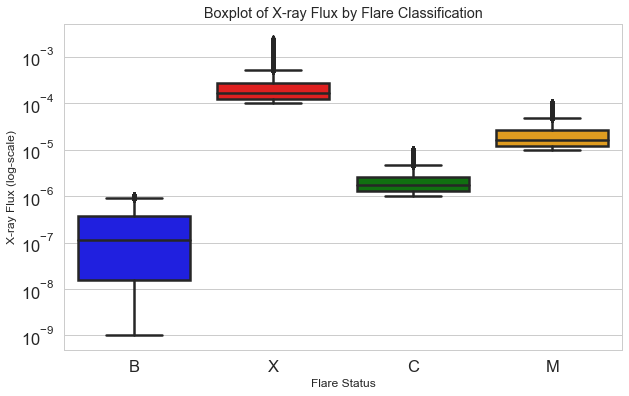

In [35]:
# Create a figure for the boxplot
plt.figure(figsize=(10, 6))
colors = {'M': 'orange', 'X': 'red', 'C': 'green', 'B': 'blue'}
# Create a boxplot
sns.boxplot(x='flux_classification', y='xray_flux', data=df, palette=colors)

# Set title and labels
plt.title('Boxplot of X-ray Flux by Flare Classification')
plt.xlabel('Flare Status')
plt.ylabel('X-ray Flux (log-scale)')
plt.yscale('log')

# Show the plot
plt.show()

C:\Users\dwtro\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


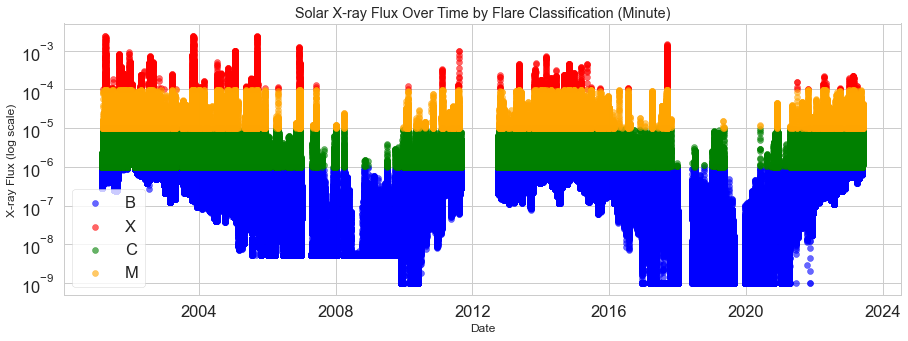

In [36]:
plot_helper2(df, '(Minute)')

In [37]:
df

xray_flux flare_status flux_classification
time                                                              
2001-03-01 00:00:00  3.478442e-07    NO_STATUS                   B
2001-03-01 00:01:00  3.506659e-07    NO_STATUS                   B
2001-03-01 00:02:00  3.533112e-07    NO_STATUS                   B
2001-03-01 00:03:00  3.539179e-07    NO_STATUS                   B
2001-03-01 00:04:00  3.518512e-07    NO_STATUS                   B
...                           ...          ...                 ...
2023-06-05 23:55:00  1.385846e-06    NO_STATUS                   C
2023-06-05 23:56:00  1.439124e-06    NO_STATUS                   C
2023-06-05 23:57:00  1.573129e-06    NO_STATUS                   C
2023-06-05 23:58:00  1.570350e-06    NO_STATUS                   C
2023-06-05 23:59:00  1.580912e-06    NO_STATUS                   C

[11710080 rows x 3 columns]

In [38]:
status_mapping = {'B': 0, 'C': 1, 'M': 2, 'X': 3}
df['status_numeric'] = df['flux_classification'].map(status_mapping)

def custom_resample(group):
    xray_flux_mean = group['xray_flux'].mean()
    flare_class_max = group['flux_classification'].max()
    
    return pd.Series({
        'xray_flux': xray_flux_mean,
        'flux_classification': flare_class_max
    })

# Applying custom resample for different frequencies
df_hourly = df.resample('H').apply(custom_resample)
df_daily = df.resample('D').apply(custom_resample)

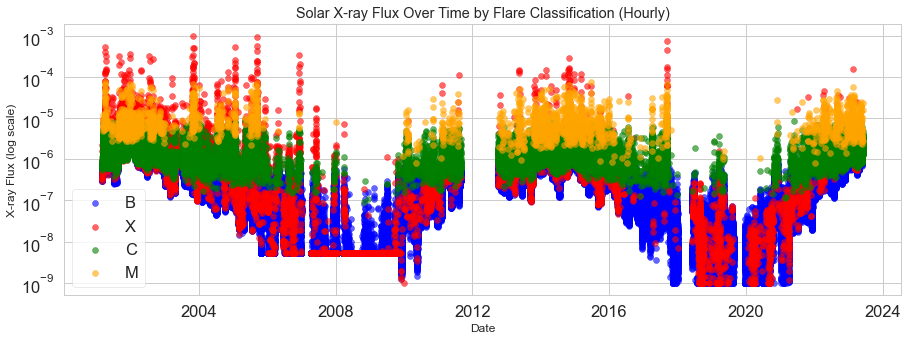

In [39]:
plot_helper2(df_hourly,'(Hourly)')

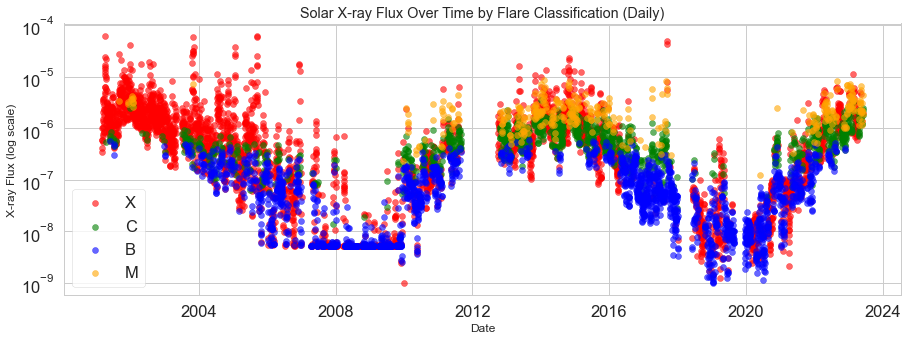

In [40]:
plot_helper2(df_daily,'(Daily)')

In [41]:
# Map status to numeric for aggregation
status_mapping = {'B': 0, 'C': 1, 'M': 2, 'X': 3}
df['status_numeric'] = df['flux_classification'].map(status_mapping)

# Custom resample function
def custom_resample(group):
    xray_flux_975 = group['xray_flux'].quantile(0.975)  # 97.5 percentile

    return pd.Series({
        'xray_flux': xray_flux_975,
    })

# Apply custom resample for a 6-hour frequency
df_6hour = df.resample('6H').apply(custom_resample)

df_6hour['flux_classification'] = df_6hour['xray_flux'].apply(classify_flux)

In [42]:
df_6hour

xray_flux flux_classification
time                                                 
2001-03-01 00:00:00  7.232771e-07                   B
2001-03-01 06:00:00  4.457506e-07                   B
2001-03-01 12:00:00  3.323626e-07                   B
2001-03-01 18:00:00  6.709058e-07                   B
2001-03-02 00:00:00  9.369188e-07                   B
...                           ...                 ...
2023-06-04 18:00:00  3.401591e-06                   C
2023-06-05 00:00:00  4.741077e-06                   C
2023-06-05 06:00:00  2.836362e-06                   C
2023-06-05 12:00:00  2.527672e-06                   C
2023-06-05 18:00:00  3.023061e-06                   C

[32528 rows x 2 columns]

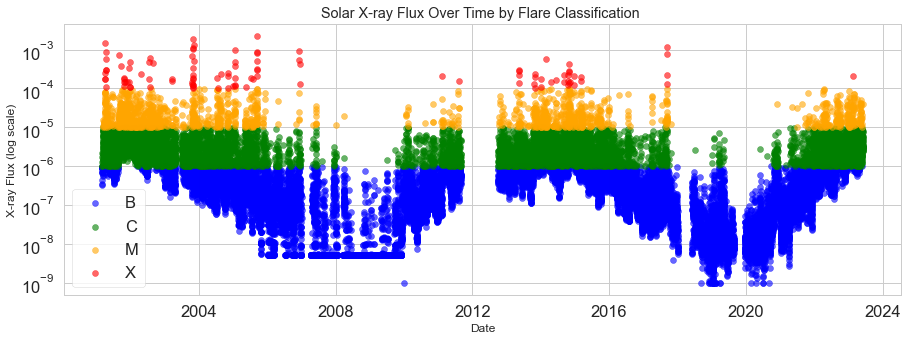

In [43]:
plot_helper2(df_6hour,'')

In [44]:
df_interpolated = df_6hour.interpolate(method='linear')
df_interpolated['flux_classification'] = df_interpolated['xray_flux'].apply(classify_flux)

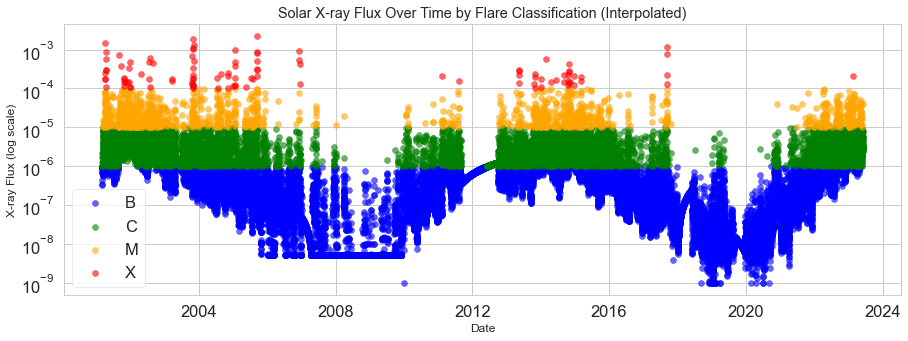

In [45]:
plot_helper2(df_interpolated,'(Interpolated)')

In [46]:
# Daily counts
daily_counts = df_interpolated.groupby([pd.Grouper(freq='D'), 'flux_classification']).size().unstack().fillna(0)
# Weekly counts
weekly_counts = df_interpolated.groupby([pd.Grouper(freq='W'), 'flux_classification']).size().unstack().fillna(0)
# Monthly counts
monthly_counts = df_interpolated.groupby([pd.Grouper(freq='M'), 'flux_classification']).size().unstack().fillna(0)
# Yearly counts
yearly_counts = df_interpolated.groupby([pd.Grouper(freq='Y'), 'flux_classification']).size().unstack().fillna(0)

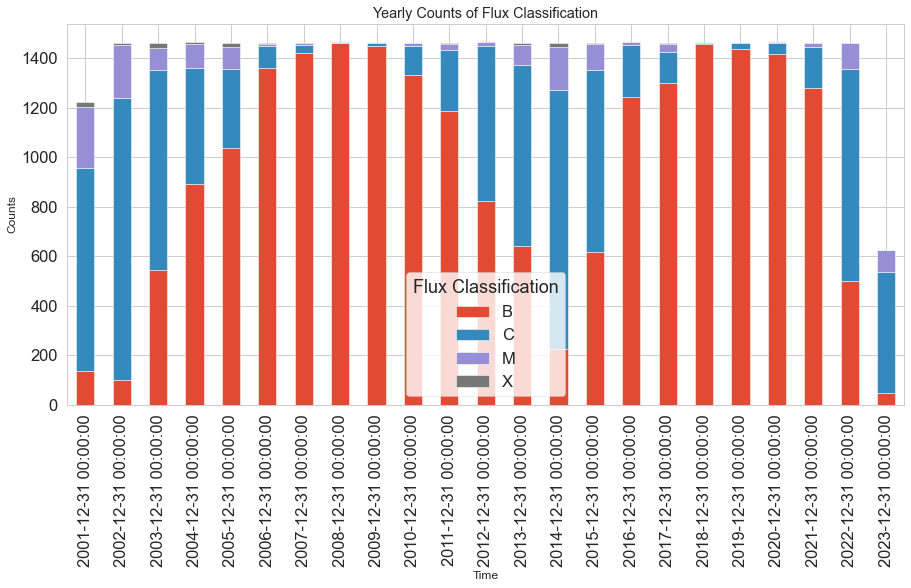

In [47]:
def plot_classification_counts(data, title):
    data.plot(kind='bar', stacked=True, figsize=(15, 7))
    plt.title(title)
    plt.ylabel('Counts')
    plt.xlabel('Time')
    plt.legend(title='Flux Classification')
    plt.show()

# Plotting
plot_classification_counts(yearly_counts, 'Yearly Counts of Flux Classification')

In [48]:
extracted_df = df_interpolated['2013-01-01':'2016-01-01']
extracted_df

xray_flux flux_classification
time                                                 
2013-01-01 00:00:00  7.868235e-07                   B
2013-01-01 06:00:00  1.355836e-06                   C
2013-01-01 12:00:00  7.400900e-07                   B
2013-01-01 18:00:00  7.646879e-07                   B
2013-01-02 00:00:00  7.707375e-07                   B
...                           ...                 ...
2015-12-31 18:00:00  9.319005e-07                   B
2016-01-01 00:00:00  1.022002e-06                   C
2016-01-01 06:00:00  2.777074e-06                   C
2016-01-01 12:00:00  8.073505e-07                   B
2016-01-01 18:00:00  2.738634e-05                   M

[4384 rows x 2 columns]

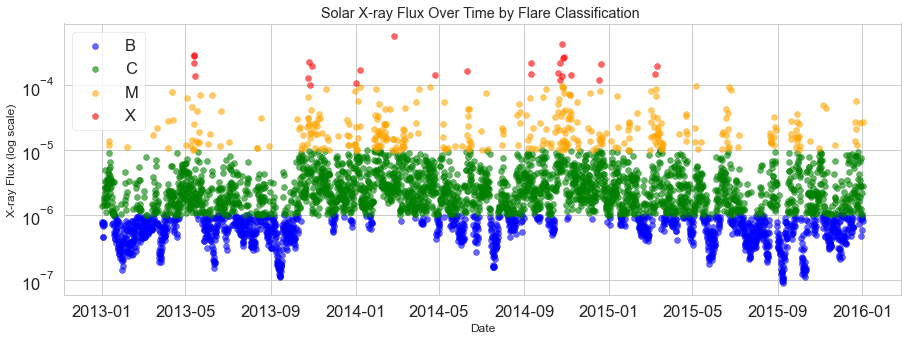

In [49]:
plot_helper2(extracted_df,'')

In [50]:
# 95% train 5% test
train_df = extracted_df.iloc[:int(len(extracted_df) * 0.95)]
test_df = extracted_df.iloc[int(len(extracted_df) * 0.95):]

print(f"Training data: from {train_df.index[0]} to {train_df.index[-1]}")
print(f"Test data: from {test_df.index[0]} to {test_df.index[-1]}")

Training data: from 2013-01-01 00:00:00 to 2015-11-07 18:00:00
Test data: from 2015-11-08 00:00:00 to 2016-01-01 18:00:00


In [51]:
# Extract month from the index for grouping (ignoring the year)
df_interpolated['Month'] = df_interpolated.index.strftime('%b')  # %b gives the month's abbreviated name

# Group by the new 'Month' column and get high, low, and median values
monthly_stats = df_interpolated.groupby('Month')['xray_flux'].agg(['max', 'min', 'median']).reset_index()

# Melt the DataFrame for easier plotting
monthly_melted = pd.melt(monthly_stats, id_vars='Month', value_vars=['max', 'min', 'median'],
                         var_name='Statistic', value_name='xray_flux')

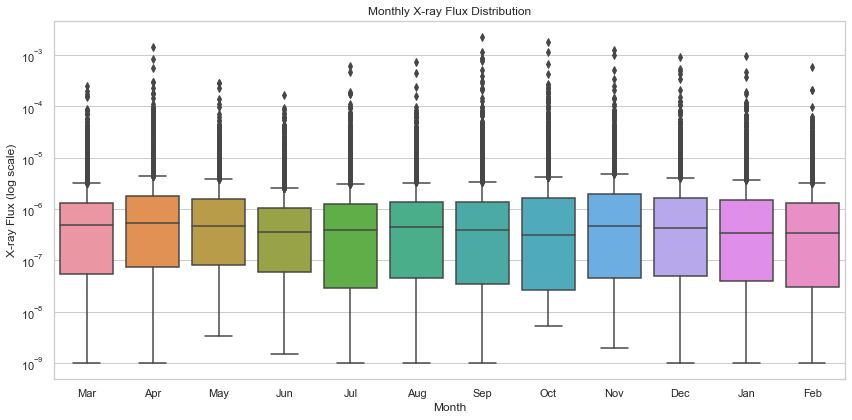

In [52]:
# Create a boxplot of x-ray flux based on month
sns.set(style="whitegrid")  # Set the style for the plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='xray_flux', data=df_interpolated)
plt.yscale('log')  # Use a log scale for the y-axis due to wide range of values
plt.title('Monthly X-ray Flux Distribution')
plt.xlabel('Month')
plt.ylabel('X-ray Flux (log scale)')
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

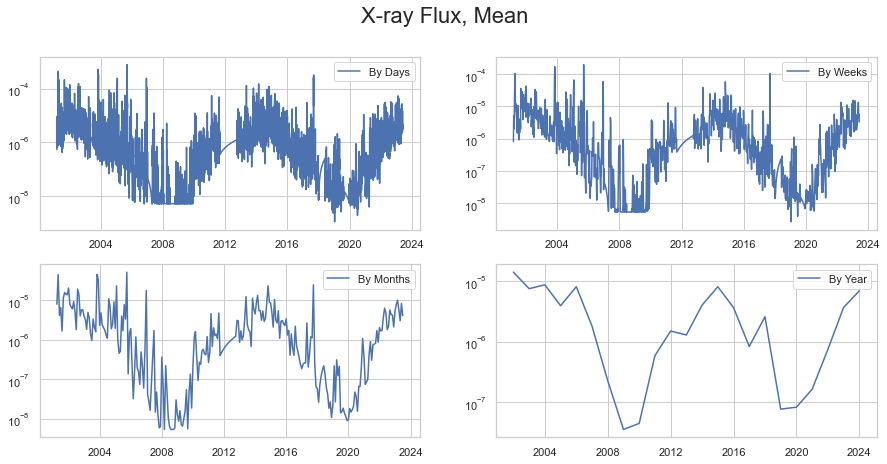

In [53]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('X-ray Flux, Mean' , fontsize=22)

plt.subplot(221)
plt.plot(df_interpolated.xray_flux.resample('D').mean(), '-', label='By Days')
plt.yscale('log')
plt.legend()

plt.subplot(222)
plt.plot(df_interpolated.xray_flux.resample('W').mean(), '-', label='By Weeks')
plt.yscale('log')
plt.legend()

plt.subplot(223)
plt.plot(df_interpolated.xray_flux.resample('M').mean(), '-', label='By Months')
plt.yscale('log')
plt.legend()

plt.subplot(224)
plt.plot(df_interpolated.xray_flux.resample('A-DEC').mean(), '-', label='By Year')
plt.yscale('log')
plt.legend()

# plt.tight_layout()
plt.show()

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df_interpolated['xray_flux'], model='additive', period=int(365*11))

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend Component')
ax1.set_ylabel('X-Ray Flux')

decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonal Component')
ax2.set_ylabel('Seasonal Effect')

decomposition.resid.plot(ax=ax3)
ax3.set_title('Residual Component')
ax3.set_ylabel('Residual')

plt.tight_layout()
plt.show()

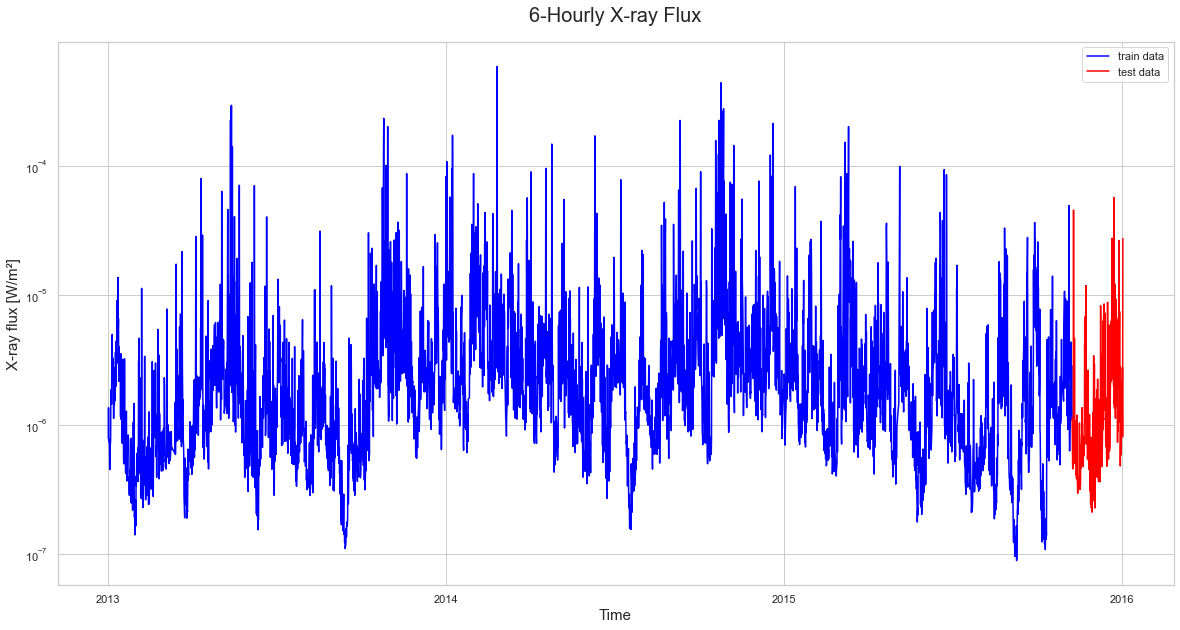

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train_df["xray_flux"], label="train data", color = 'blue')
ax.plot(test_df["xray_flux"], label="test data", color="red")

ax.xaxis.set_major_locator(mdates.YearLocator()) # Big ticks on year
ax.xaxis.set_minor_locator(mdates.MonthLocator()) # Small ticks on month
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax.set_title("6-Hourly X-ray Flux", fontsize=20, pad=20)
ax.set_xlabel("Time", fontsize=15)
ax.set_ylabel("X-ray flux [W/m²]", fontsize=15)

ax.grid(True)
ax.set_yscale("log")
plt.legend()

In [56]:
# Log Transformation
train_df['log_xray_flux'] = np.log(train_df['xray_flux'])
test_df['log_xray_flux'] = np.log(test_df['xray_flux'])

C:\Users\dwtro\AppData\Local\Temp\ipykernel_33840\68408234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['log_xray_flux'] = np.log(train_df['xray_flux'])
C:\Users\dwtro\AppData\Local\Temp\ipykernel_33840\68408234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['log_xray_flux'] = np.log(test_df['xray_flux'])


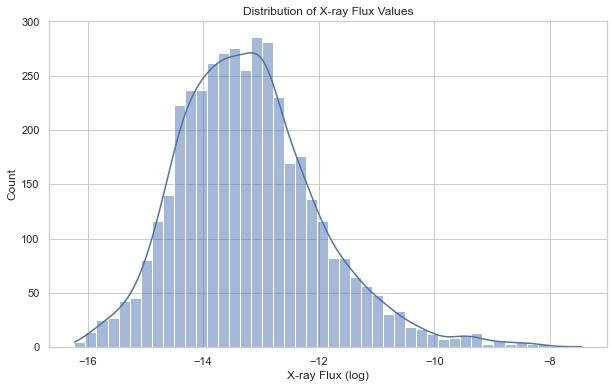

In [57]:
# Histogram of X-ray Flux
plt.figure(figsize=(10, 6))
sns.histplot(train_df['log_xray_flux'], kde=True)
plt.title('Distribution of X-ray Flux Values')
plt.xlabel('X-ray Flux (log)')
plt.show()

In [58]:
check_stationarity(train_df['log_xray_flux'])

Results of Dickey-Fuller Test:
ADF Statistic: -8.275906798981378
p-value: 4.657428085283392e-13
Critial Values [1%]: -3.431925571033693
Critial Values [5%]: -2.862236200776663
Critial Values [10%]: -2.5671405938787677


C:\Users\dwtro\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


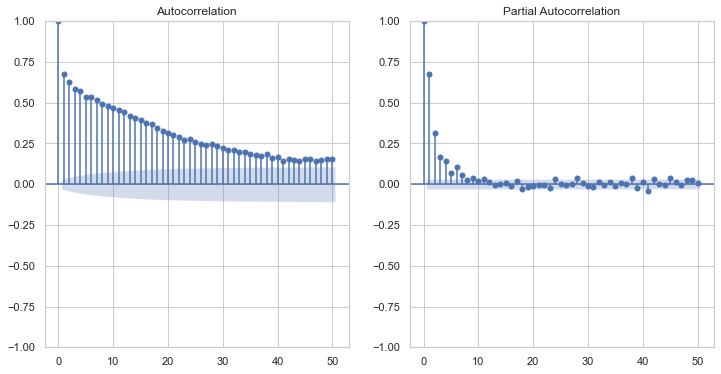

In [59]:
# Model Identification
# Plot ACF and PACF to determine p and q
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sm.graphics.tsa.plot_acf(train_df['log_xray_flux'], lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(train_df['log_xray_flux'], lags=50, ax=ax2)
plt.show()

                               SARIMAX Results                                
Dep. Variable:          log_xray_flux   No. Observations:                 4164
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5451.781
Date:                Wed, 20 Dec 2023   AIC                          10907.562
Time:                        16:52:53   BIC                          10920.230
Sample:                    01-01-2013   HQIC                         10912.043
                         - 11-07-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4231      0.010    -43.634      0.000      -0.442      -0.404
sigma2         0.8035      0.012     69.811      0.000       0.781       0.826
Ljung-Box (L1) (Q):                  41.05   Jarque-

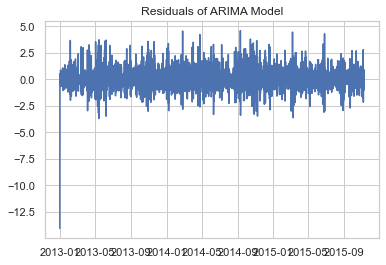

In [60]:
# Model Fitting
model = sm.tsa.arima.ARIMA(train_df['log_xray_flux'], order=(1, 1, 0))
fitted_model = model.fit()

# Summarize the model results
print(fitted_model.summary())

# Model Diagnostics
# Check residuals
residuals = fitted_model.resid
plt.figure()
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

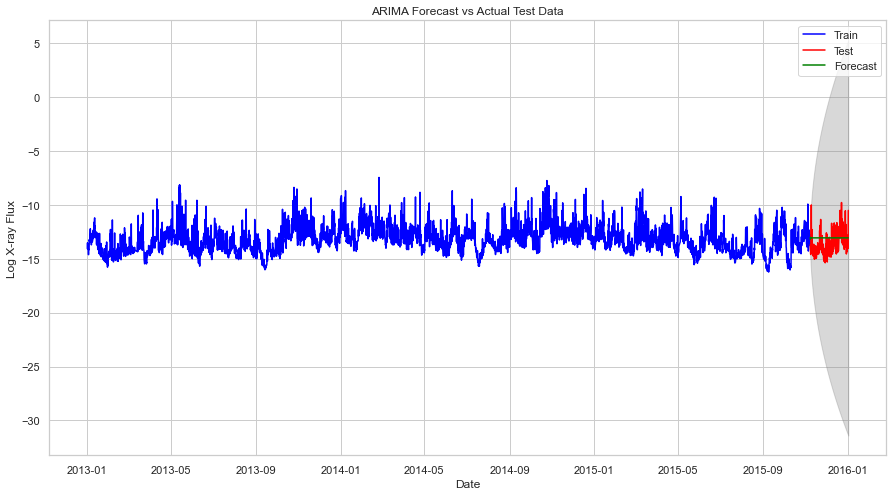

In [61]:
# Predict future values - we only need the number of periods in test_df
forecast_results = fitted_model.get_forecast(steps=len(test_df))

# Obtain forecast mean and confidence intervals
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Since we need to append the forecast to the end of the training index
# We create a new index for the forecasted values that continues from the end of the train_df index
forecast_index = pd.date_range(start=train_df.index[-1], periods=len(test_df) + 1, freq=train_df.index.freq)[1:]

# Create a DataFrame for the forecasted values and the confidence intervals
forecast_df = pd.DataFrame({'forecast': forecast_mean}, index=forecast_index)
forecast_df['lower_conf'] = conf_int.iloc[:, 0]
forecast_df['upper_conf'] = conf_int.iloc[:, 1]

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(train_df['log_xray_flux'], label='Train', color='blue')  # Training data
plt.plot(test_df['log_xray_flux'], label='Test', color='red')  # Test data
plt.plot(forecast_df['forecast'], label='Forecast', color='green')  # Forecasted values
plt.fill_between(forecast_df.index, 
                 forecast_df['lower_conf'], 
                 forecast_df['upper_conf'], 
                 color='grey', alpha=0.3)  # Confidence intervals
plt.title('ARIMA Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [62]:
# Calculate error measures
mae = mean_absolute_error(test_df['log_xray_flux'], forecast_df['forecast'])
mse = mean_squared_error(test_df['log_xray_flux'], forecast_df['forecast'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['log_xray_flux'] - forecast_df['forecast']) / test_df['log_xray_flux'])) * 100

# Print error measures
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 1.0606588997528443
Mean Squared Error (MSE): 1.5056001312299827
Root Mean Squared Error (RMSE): 1.2270289854889258
Mean Absolute Percentage Error (MAPE): 7.81%


In [63]:
# Using auto_arima to find the best ARIMA model parameters
auto_arima_model = auto_arima(train_df['log_xray_flux'],
                              start_p=0, start_q=0,
                              max_p=5, max_q=5, max_d=2,
                              seasonal=False,  
                              trace=True, error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)  

# The summary of the best model
print(auto_arima_model.summary())

# Fitting the best ARIMA model found by auto_arima
fitted_model = auto_arima_model.fit(train_df['log_xray_flux'])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11728.562, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10909.562, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10385.528, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11726.563, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10346.550, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10338.357, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10676.137, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10340.349, Time=0.60 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10339.406, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10338.319, Time=1.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10352.777, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10342.823, Time=0.90 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10340.245, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10339.428, Time=1.71 sec
 ARIMA(1,1,2)(0,0,0

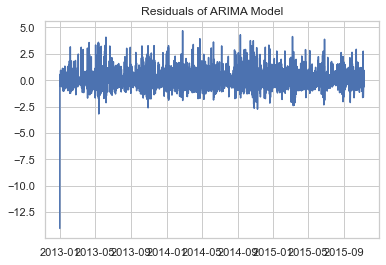

In [64]:
# Model Diagnostics
residuals = fitted_model.arima_res_.resid

# Now you can plot the residuals
plt.figure()
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

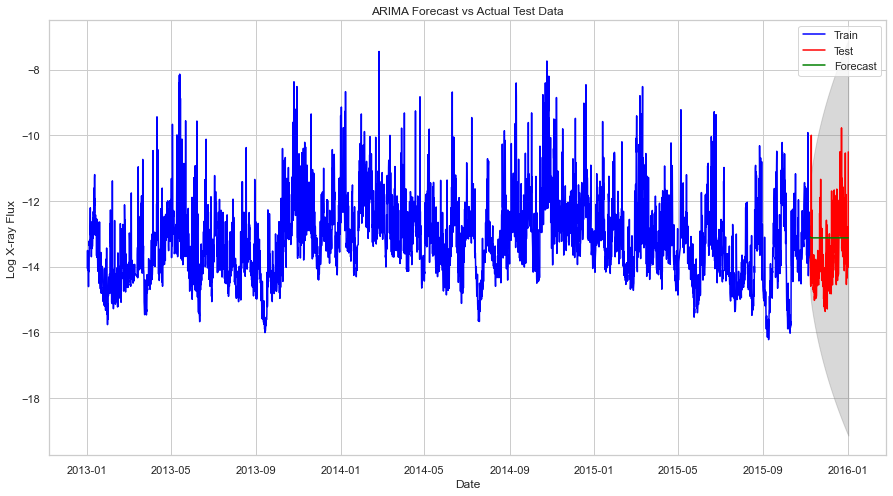

In [65]:
# Predict future values - we only need the number of periods in test_df
forecast_mean, conf_int = fitted_model.predict(n_periods=len(test_df), return_conf_int=True)

# Assuming the test_df index is a continuation of the train_df index
forecast_index = test_df.index

# Create a DataFrame for the forecasted values and the confidence intervals
forecast_df = pd.DataFrame({'forecast': forecast_mean, 'lower_conf': conf_int[:, 0], 'upper_conf': conf_int[:, 1]}, index=forecast_index)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(train_df['log_xray_flux'], label='Train', color='blue')  # Training data
plt.plot(test_df['log_xray_flux'], label='Test', color='red')  # Test data
plt.plot(forecast_df['forecast'], label='Forecast', color='green')  # Forecasted values
plt.fill_between(forecast_df.index, 
                 forecast_df['lower_conf'], 
                 forecast_df['upper_conf'], 
                 color='grey', alpha=0.3)  # Confidence intervals
plt.title('ARIMA Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [66]:
# Calculate error measures
mae = mean_absolute_error(test_df['log_xray_flux'], forecast_df['forecast'])
mse = mean_squared_error(test_df['log_xray_flux'], forecast_df['forecast'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['log_xray_flux'] - forecast_df['forecast']) / test_df['log_xray_flux'])) * 100

# Print error measures
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 1.0228908445696825
Mean Squared Error (MSE): 1.4251644537284458
Root Mean Squared Error (RMSE): 1.1938025187309858
Mean Absolute Percentage Error (MAPE): 7.56%


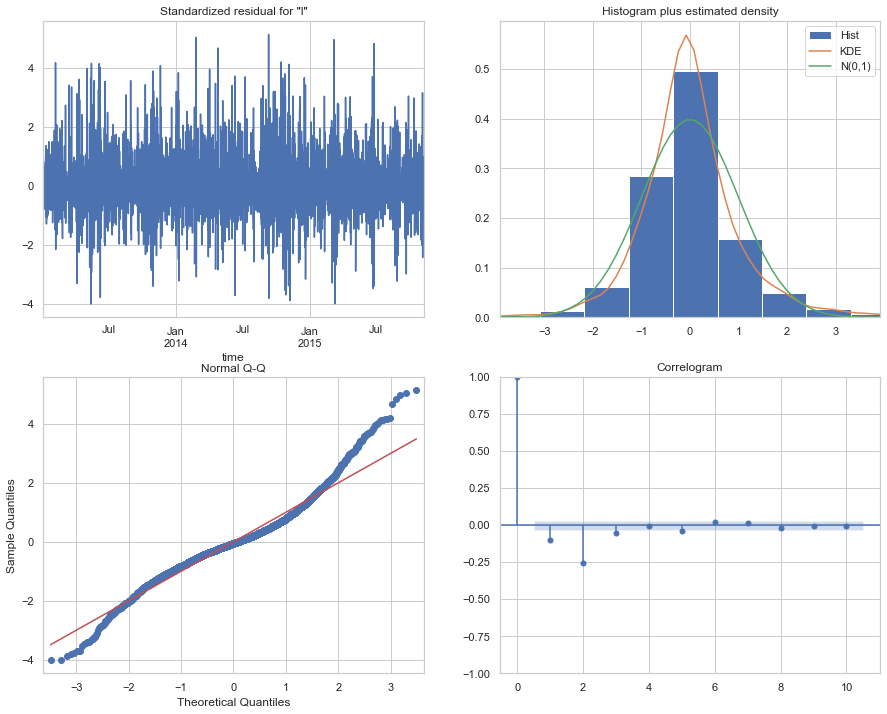

In [67]:
S = 4

# Define the SARIMA model with the seasonal order
sarima_model = sm.tsa.SARIMAX(train_df['log_xray_flux'],
                              order=(1, 1, 0),
                              seasonal_order=(1, 1, 1, S),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

# Fit the model
sarima_results = sarima_model.fit()

# Check diagnostics
sarima_results.plot_diagnostics(figsize=(15, 12))
plt.show()

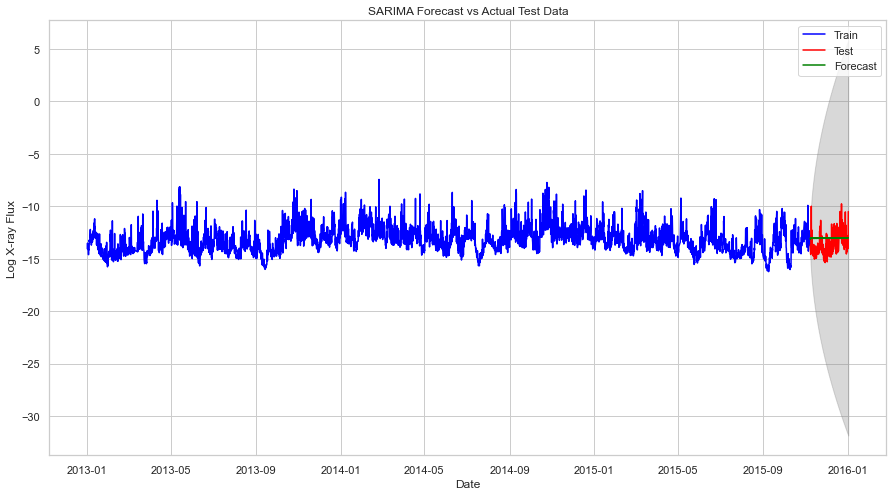

In [68]:
# Assuming 'sarima_results' is the fitted SARIMA model from statsmodels
forecast_steps = len(test_df)  # Number of steps to forecast (size of your test set)

# Get the forecast for the specified number of steps ahead
forecast_obj = sarima_results.get_forecast(steps=forecast_steps)

# The forecast mean
forecast_mean = forecast_obj.predicted_mean

# The confidence intervals of the forecast
conf_int = forecast_obj.conf_int()

# Since the test_df should directly follow the train_df, we can use the test_df index for the forecast
forecast_index = test_df.index

# Create a DataFrame to hold the forecast and confidence intervals
forecast_df = pd.DataFrame(forecast_mean, index=forecast_index)
forecast_df['lower_conf'] = conf_int.iloc[:, 0]
forecast_df['upper_conf'] = conf_int.iloc[:, 1]

# Now plot the forecast and the actuals
plt.figure(figsize=(15, 8))
plt.plot(train_df['log_xray_flux'], label='Train', color='blue')  # Training data
plt.plot(test_df['log_xray_flux'], label='Test', color='red')  # Test data
plt.plot(forecast_df.index, forecast_df.iloc[:, 0], label='Forecast', color='green')  # Forecasted values
plt.fill_between(forecast_df.index,
                 forecast_df['lower_conf'],
                 forecast_df['upper_conf'],
                 color='grey', alpha=0.3)  # Confidence intervals
plt.title('SARIMA Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [69]:
# Calculate error measures
mae = mean_absolute_error(test_df['log_xray_flux'], forecast_df['predicted_mean'])
mse = mean_squared_error(test_df['log_xray_flux'], forecast_df['predicted_mean'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['log_xray_flux'] - forecast_df['predicted_mean']) / test_df['log_xray_flux'])) * 100

# Print error measures
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 1.0691191454147628
Mean Squared Error (MSE): 1.5194736512544125
Root Mean Squared Error (RMSE): 1.232669319507228
Mean Absolute Percentage Error (MAPE): 7.86%


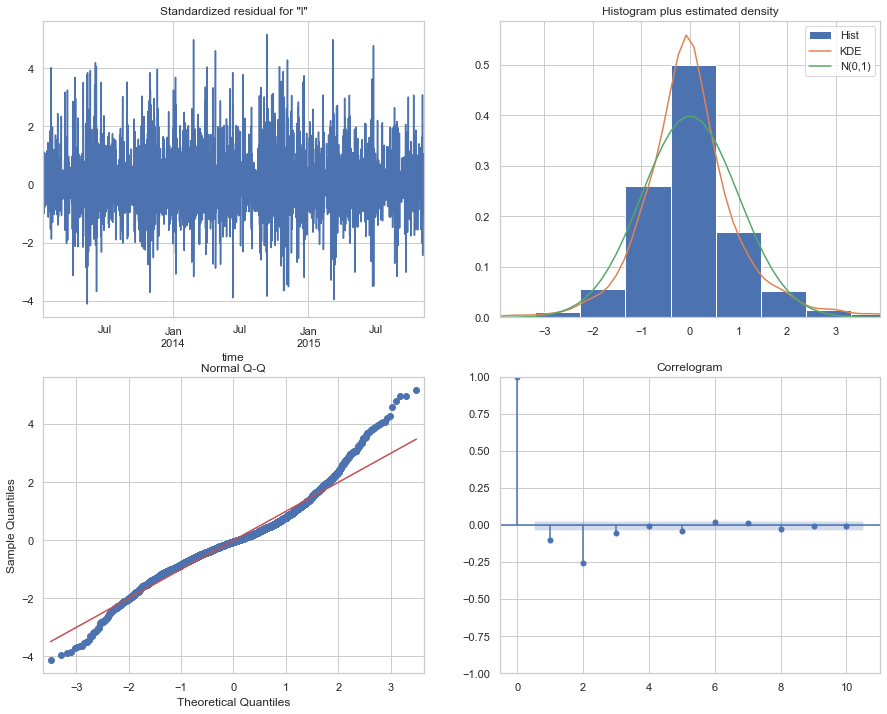

In [70]:
S = 28
# Define the SARIMA model with the seasonal order
sarima_model = sm.tsa.SARIMAX(train_df['log_xray_flux'],
                              order=(1, 1, 0),
                              seasonal_order=(1, 1, 1, S),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

# Fit the model
sarima_results = sarima_model.fit()

# Check diagnostics
sarima_results.plot_diagnostics(figsize=(15, 12))
plt.show()

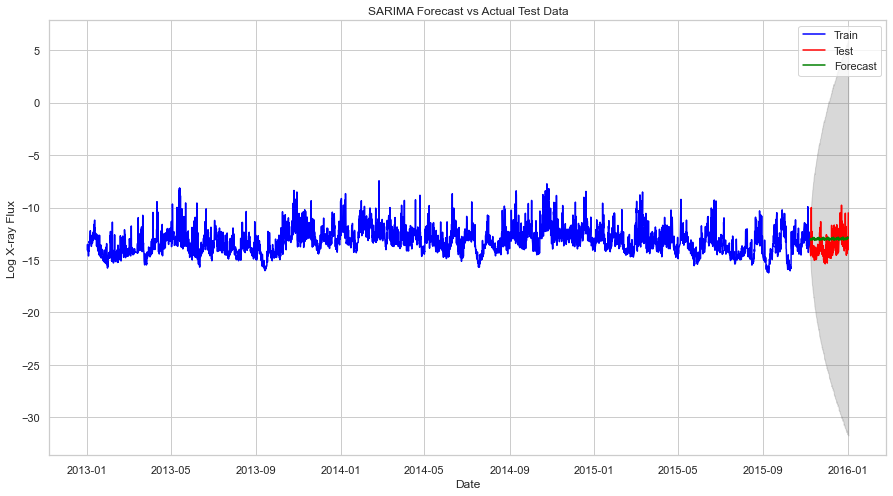

In [71]:
forecast_steps = len(test_df)  # Number of steps to forecast (size of your test set)

# Get the forecast for the specified number of steps ahead
forecast_obj = sarima_results.get_forecast(steps=forecast_steps)

# The forecast mean
forecast_mean = forecast_obj.predicted_mean

# The confidence intervals of the forecast
conf_int = forecast_obj.conf_int()

forecast_index = test_df.index

# Create a DataFrame to hold the forecast and confidence intervals
forecast_df = pd.DataFrame(forecast_mean, index=forecast_index)
forecast_df['lower_conf'] = conf_int.iloc[:, 0]
forecast_df['upper_conf'] = conf_int.iloc[:, 1]

# Plot the forecast and the actuals
plt.figure(figsize=(15, 8))
plt.plot(train_df['log_xray_flux'], label='Train', color='blue')  # Training data
plt.plot(test_df['log_xray_flux'], label='Test', color='red')  # Test data
plt.plot(forecast_df.index, forecast_df.iloc[:, 0], label='Forecast', color='green')  # Forecasted values
plt.fill_between(forecast_df.index,
                 forecast_df['lower_conf'],
                 forecast_df['upper_conf'],
                 color='grey', alpha=0.3)  # Confidence intervals
plt.title('SARIMA Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [72]:
# Calculate error measures
mae = mean_absolute_error(test_df['log_xray_flux'], forecast_df['predicted_mean'])
mse = mean_squared_error(test_df['log_xray_flux'], forecast_df['predicted_mean'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['log_xray_flux'] - forecast_df['predicted_mean']) / test_df['log_xray_flux'])) * 100

# Print error measures
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 1.10898128512489
Mean Squared Error (MSE): 1.6102553777009823
Root Mean Squared Error (RMSE): 1.268958382966511
Mean Absolute Percentage Error (MAPE): 8.13%


In [73]:
# Apply custom resample for a 1-day frequency
df_day = df.resample('D').apply(custom_resample)
df_interpolated = df_day.interpolate(method='linear')
df_interpolated['flux_classification'] = df_interpolated['xray_flux'].apply(classify_flux)

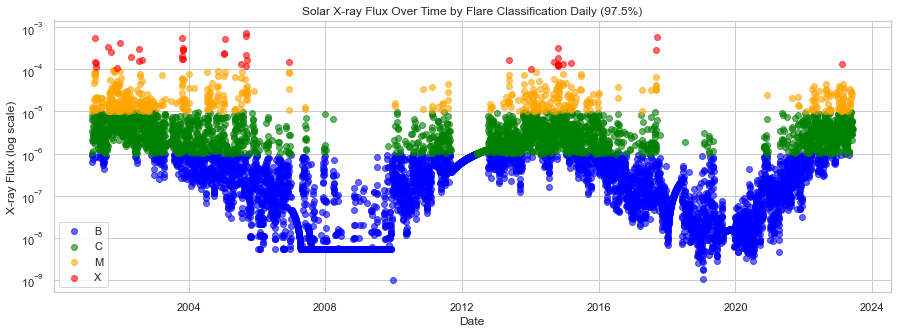

In [74]:
plot_helper2(df_interpolated,'Daily (97.5%)')

In [75]:
# 95% train 5% test
train_df = df_interpolated.iloc[:int(len(df_interpolated) * 0.95)]
test_df = df_interpolated.iloc[int(len(df_interpolated) * 0.95):]

print(f"Training data: from {train_df.index[0]} to {train_df.index[-1]}")
print(f"Test data: from {test_df.index[0]} to {test_df.index[-1]}")

Training data: from 2001-03-01 00:00:00 to 2022-04-24 00:00:00
Test data: from 2022-04-25 00:00:00 to 2023-06-05 00:00:00


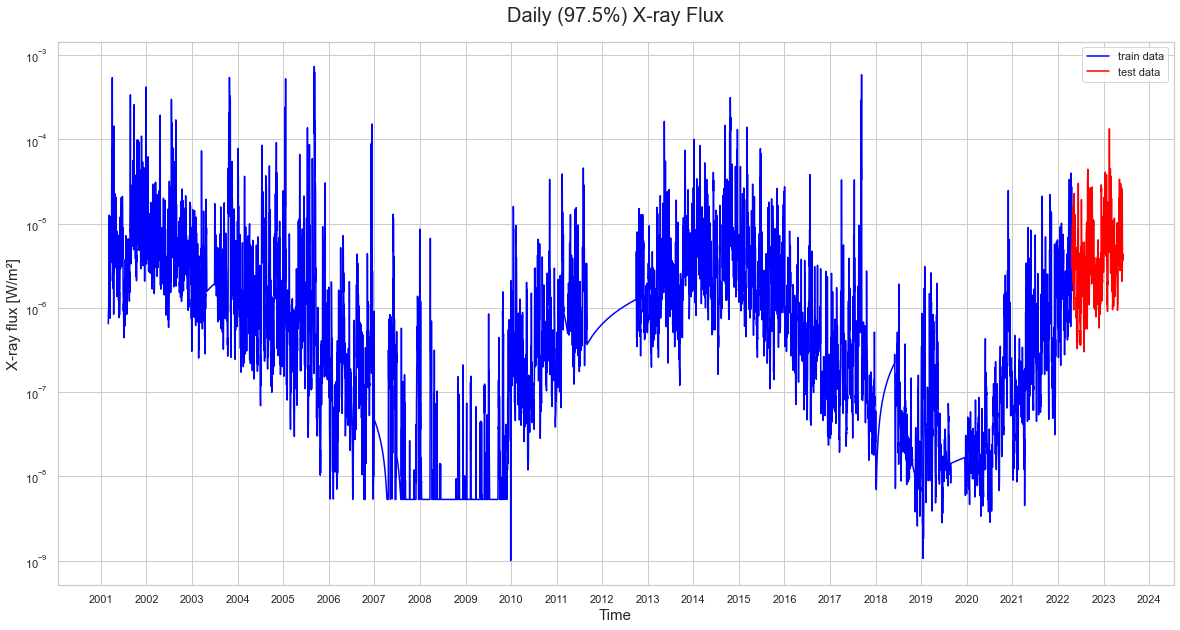

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train_df["xray_flux"], label="train data", color = 'blue')
ax.plot(test_df["xray_flux"], label="test data", color="red")

ax.xaxis.set_major_locator(mdates.YearLocator()) # Big ticks on year
ax.xaxis.set_minor_locator(mdates.MonthLocator()) # Small ticks on month
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax.set_title("Daily (97.5%) X-ray Flux", fontsize=20, pad=20)
ax.set_xlabel("Time", fontsize=15)
ax.set_ylabel("X-ray flux [W/m²]", fontsize=15)

ax.grid(True)
ax.set_yscale("log")
plt.legend()

In [77]:
# Log Transformation
train_df['log_xray_flux'] = np.log(train_df['xray_flux'])
test_df['log_xray_flux'] = np.log(test_df['xray_flux'])
check_stationarity(train_df['log_xray_flux'])

Results of Dickey-Fuller Test:
ADF Statistic: -4.089387184467257
p-value: 0.0010083937638071952
Critial Values [1%]: -3.431199653412552
Critial Values [5%]: -2.861915483909216
Critial Values [10%]: -2.5669698655478084


C:\Users\dwtro\AppData\Local\Temp\ipykernel_33840\18854904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['log_xray_flux'] = np.log(train_df['xray_flux'])
C:\Users\dwtro\AppData\Local\Temp\ipykernel_33840\18854904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['log_xray_flux'] = np.log(test_df['xray_flux'])


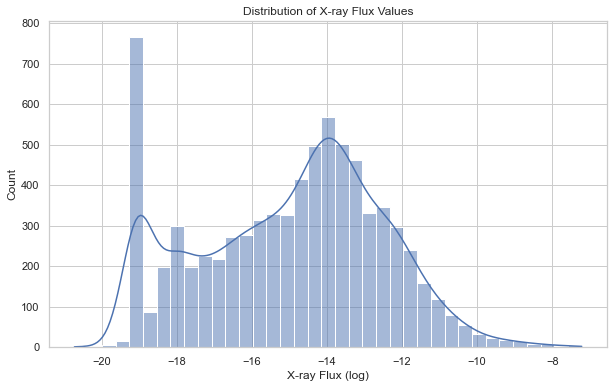

In [78]:
# Histogram of X-ray Flux
plt.figure(figsize=(10, 6))
sns.histplot(train_df['log_xray_flux'], kde=True)
plt.title('Distribution of X-ray Flux Values')
plt.xlabel('X-ray Flux (log)')
plt.show()

C:\Users\dwtro\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


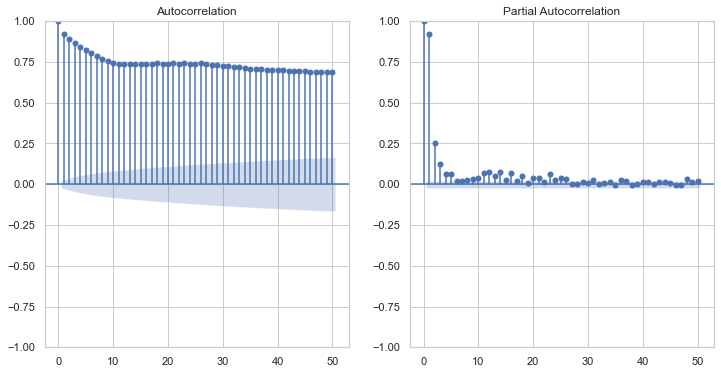

In [79]:
# Model Identification
# Plot ACF and PACF to determine p and q
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sm.graphics.tsa.plot_acf(train_df['log_xray_flux'], lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(train_df['log_xray_flux'], lags=50, ax=ax2)
plt.show()

In [80]:
# Using auto_arima to find the best ARIMA model parameters
auto_arima_model = auto_arima(train_df['log_xray_flux'],
                              start_p=1, start_q=1,
                              max_p=3, max_q=3, max_d=2,
                              seasonal=False,  # Set to True if including shorter seasonal cycles
                              start_P=0, start_Q=0,
                              max_P=2, max_D=1, max_Q=2,
                              m=365, 
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

# The summary of the best model
print(auto_arima_model.summary())

# Fitting the best ARIMA model found by auto_arima
fitted_model = auto_arima_model.fit(train_df['log_xray_flux'])

C:\Users\dwtro\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (365) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20146.241, Time=2.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21204.617, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20560.105, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20355.893, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21202.617, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19962.198, Time=1.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20394.831, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19936.098, Time=3.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20349.204, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19946.019, Time=3.43 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19938.013, Time=3.89 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=19934.114, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=19960.208, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=20347.204, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0

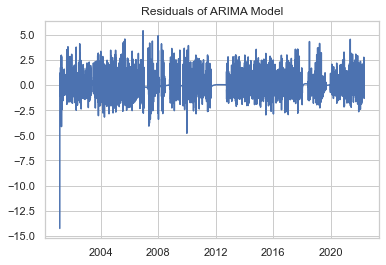

In [81]:
# Model Diagnostics
residuals = fitted_model.arima_res_.resid

# Now you can plot the residuals
plt.figure()
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

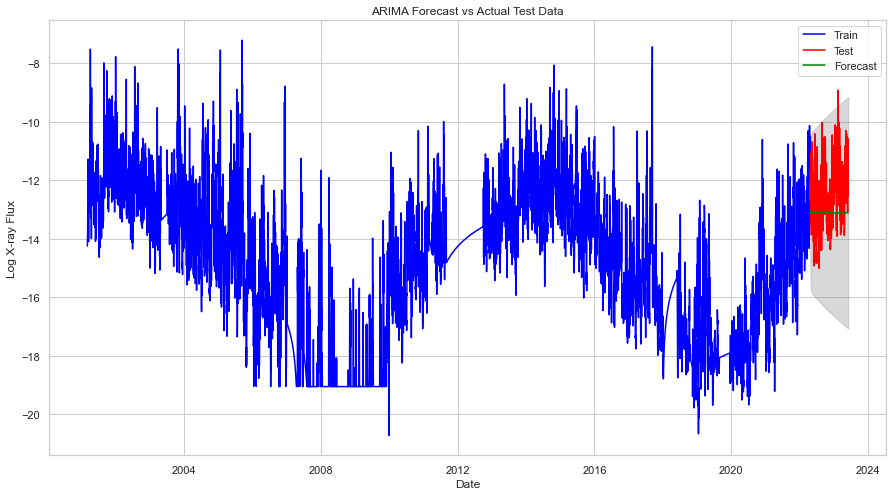

In [82]:
# Predict future values 
forecast_mean, conf_int = fitted_model.predict(n_periods=len(test_df), return_conf_int=True)
forecast_index = test_df.index

# Create a DataFrame for the forecasted values and the confidence intervals
forecast_df = pd.DataFrame({'forecast': forecast_mean, 'lower_conf': conf_int[:, 0], 'upper_conf': conf_int[:, 1]}, index=forecast_index)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(train_df['log_xray_flux'], label='Train', color='blue')  # Training data
plt.plot(test_df['log_xray_flux'], label='Test', color='red')  # Test data
plt.plot(forecast_df['forecast'], label='Forecast', color='green')  # Forecasted values
plt.fill_between(forecast_df.index, 
                 forecast_df['lower_conf'], 
                 forecast_df['upper_conf'], 
                 color='grey', alpha=0.3)  # Confidence intervals
plt.title('ARIMA Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [83]:
# Calculate error measures
mae = mean_absolute_error(test_df['log_xray_flux'], forecast_df['forecast'])
mse = mean_squared_error(test_df['log_xray_flux'], forecast_df['forecast'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['log_xray_flux'] - forecast_df['forecast']) / test_df['log_xray_flux'])) * 100

# Print error measures
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 0.9494831779432221
Mean Squared Error (MSE): 1.4141773518739498
Root Mean Squared Error (RMSE): 1.1891918902658014
Mean Absolute Percentage Error (MAPE): 7.95%


In [84]:
# Using auto_arima to find the best ARIMA model parameters
auto_arima_model = auto_arima(train_df['log_xray_flux'],
                              start_p=1, start_q=1,
                              max_p=3, max_q=3, max_d=2,
                              seasonal=False,  
                              start_P=0, start_Q=0,
                              max_P=2, max_D=1, max_Q=2,
                              m=365*11, 
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

# The summary of the best model
print(auto_arima_model.summary())

# Fitting the best ARIMA model found by auto_arima
fitted_model = auto_arima_model.fit(train_df['log_xray_flux'])

Performing stepwise search to minimize aic


C:\Users\dwtro\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (4015) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20146.241, Time=2.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21204.617, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20560.105, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20355.893, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21202.617, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19962.198, Time=1.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20394.831, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19936.098, Time=3.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20349.204, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19946.019, Time=3.47 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19938.013, Time=3.87 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=19934.114, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=19960.208, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=20347.204, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=19935.835, Time=1.31

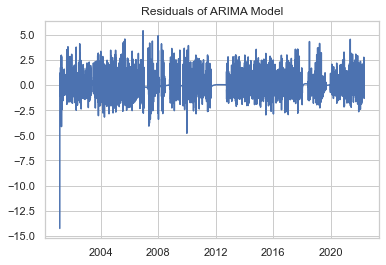

In [85]:
# Model Diagnostics
residuals = fitted_model.arima_res_.resid

# Now you can plot the residuals
plt.figure()
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

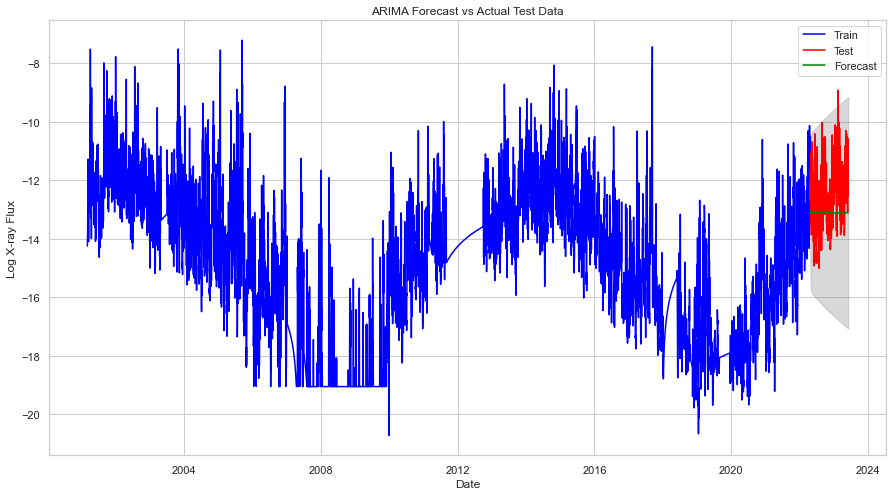

In [86]:
# Predict future values 
forecast_mean, conf_int = fitted_model.predict(n_periods=len(test_df), return_conf_int=True)
forecast_index = test_df.index

# Create a DataFrame for the forecasted values and the confidence intervals
forecast_df = pd.DataFrame({'forecast': forecast_mean, 'lower_conf': conf_int[:, 0], 'upper_conf': conf_int[:, 1]}, index=forecast_index)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(train_df['log_xray_flux'], label='Train', color='blue')  # Training data
plt.plot(test_df['log_xray_flux'], label='Test', color='red')  # Test data
plt.plot(forecast_df['forecast'], label='Forecast', color='green')  # Forecasted values
plt.fill_between(forecast_df.index, 
                 forecast_df['lower_conf'], 
                 forecast_df['upper_conf'], 
                 color='grey', alpha=0.3)  # Confidence intervals
plt.title('ARIMA Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [87]:
# Calculate error measures
mae = mean_absolute_error(test_df['log_xray_flux'], forecast_df['forecast'])
mse = mean_squared_error(test_df['log_xray_flux'], forecast_df['forecast'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['log_xray_flux'] - forecast_df['forecast']) / test_df['log_xray_flux'])) * 100

# Print error measures
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 0.9494831779432221
Mean Squared Error (MSE): 1.4141773518739498
Root Mean Squared Error (RMSE): 1.1891918902658014
Mean Absolute Percentage Error (MAPE): 7.95%


Iteration:     10,   Func. Count:     73,   Neg. LLF: 877937.674511562
Iteration:     20,   Func. Count:    134,   Neg. LLF: 23556.034025904137
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9224.875095355344
            Iterations: 27
            Function evaluations: 157
            Gradient evaluations: 23
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9224.88
Distribution:                  Normal   AIC:                           18457.8
Method:            Maximum Likelihood   BIC:                           18485.6
                                        No. Observations:                 7725
Date:                Wed, Dec 20 2023   Df Residuals:                     7724
Time:         

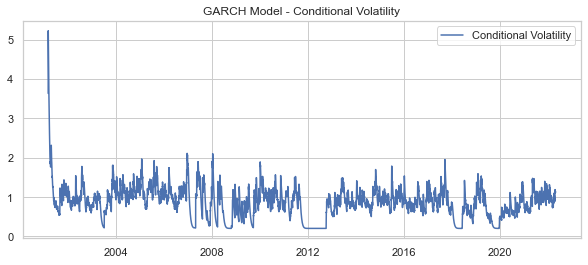

                 h.1       h.2       h.3       h.4      h.5
time                                                       
2022-04-24  1.216913  1.220017  1.223121  1.226225  1.22933


In [93]:
arima_model = sm.tsa.ARIMA(train_df['log_xray_flux'], order=(1, 1, 0))
arima_results = arima_model.fit()

#Fit a GARCH model to the residuals of the ARIMA model
garch_model = arch_model(arima_results.resid, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(update_freq=10)

# Print the summary of GARCH model results
print(garch_results.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(garch_results.conditional_volatility, label='Conditional Volatility')
plt.title('GARCH Model - Conditional Volatility')
plt.legend()
plt.show()

# Make forecasts of future volatility
forecasts = garch_results.forecast(horizon=5)
print(forecasts.variance[-1:])

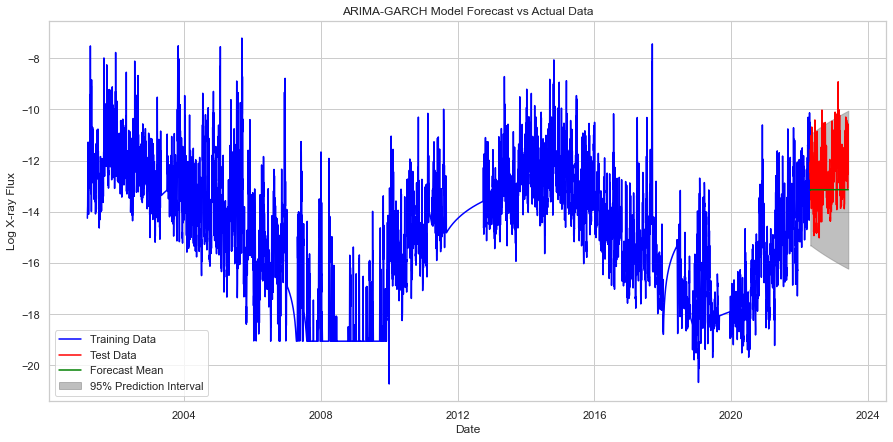

In [94]:
# Forecast future values using the ARIMA model
arima_forecast = arima_results.get_forecast(steps=len(test_df))
mean_forecast = arima_forecast.predicted_mean
confidence_intervals = arima_forecast.conf_int()

# Forecast future volatility using the GARCH model
garch_forecast = garch_results.forecast(horizon=len(test_df))
predicted_volatility = np.sqrt(garch_forecast.variance.dropna().values[-1, :])

# Combine the forecasts to create prediction intervals
lower_bounds = mean_forecast - 1.96 * predicted_volatility
upper_bounds = mean_forecast + 1.96 * predicted_volatility

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(train_df.index, train_df['log_xray_flux'], label='Training Data', color='blue')
plt.plot(test_df.index, test_df['log_xray_flux'], label='Test Data', color='red')
plt.plot(test_df.index, mean_forecast, label='Forecast Mean', color='green')
plt.fill_between(test_df.index, lower_bounds, upper_bounds, color='gray', alpha=0.5, label='95% Prediction Interval')
plt.title('ARIMA-GARCH Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

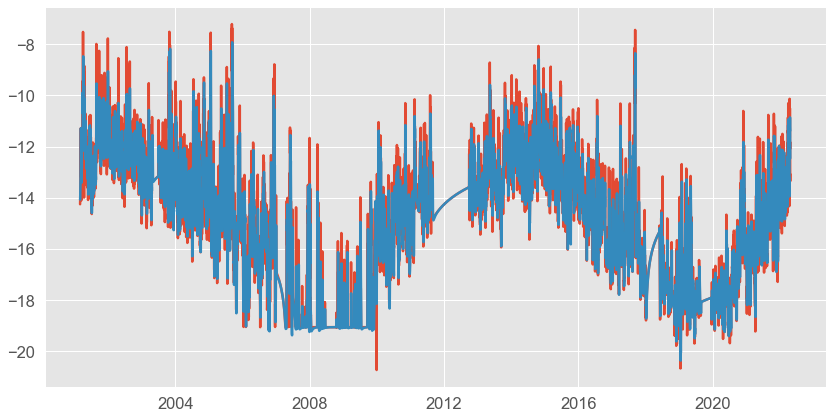

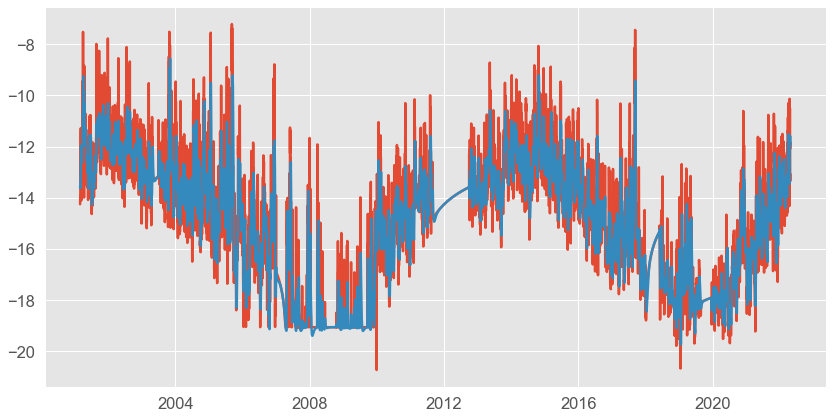

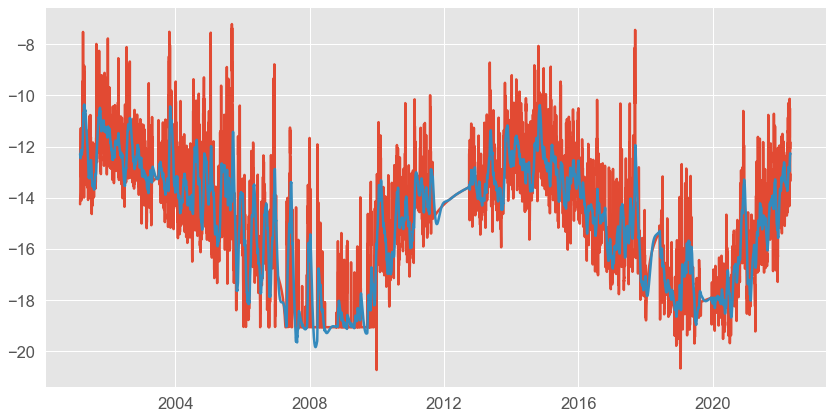

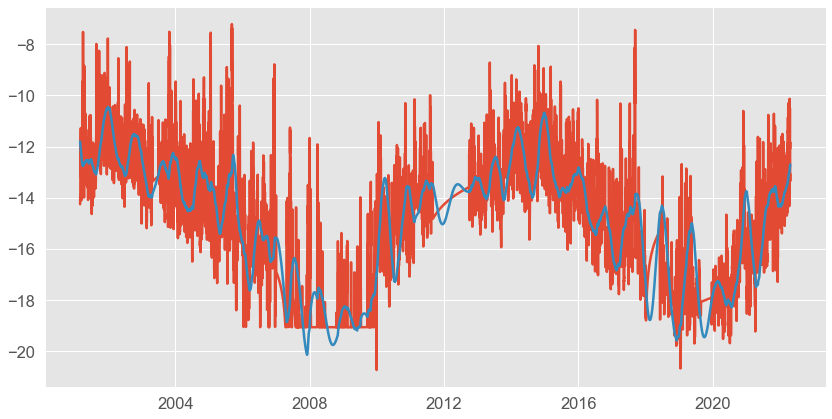

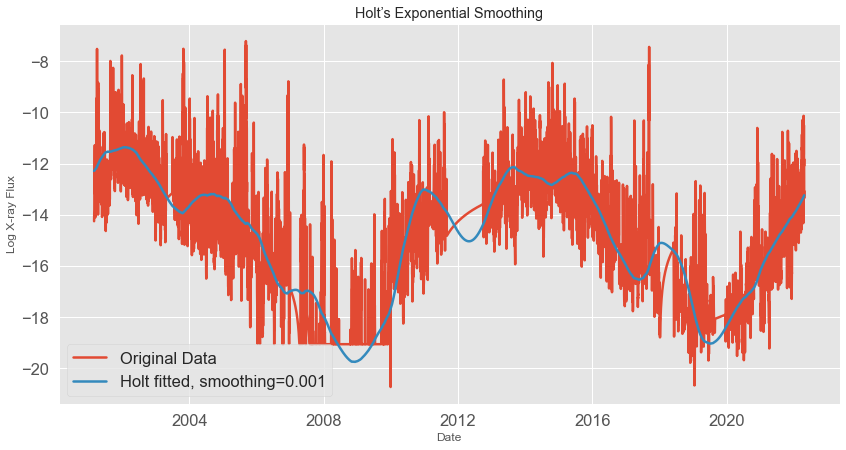

In [114]:
trends = train_df['log_xray_flux']

# Initialize the Holt model
Holt_model = ExponentialSmoothing(trends, trend='add', seasonal=None)

# Fit the model with different smoothing levels
for smoothing in [0.5, 0.05, 0.01, 0.001]:
    warnings.filterwarnings("ignore")
    Holt_model_fit = Holt_model.fit(smoothing_level=smoothing, smoothing_slope=0.05)
    
    # Plotting the results
    plt.figure(figsize=(14, 7))
    plt.plot(trends.index, trends, label='Original Data')
    plt.plot(trends.index, Holt_model_fit.fittedvalues, label=f'Holt fitted, smoothing={smoothing}')

plt.title('Holt’s Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [115]:
smooth_train = Holt_model_fit.fittedvalues
# Using auto_arima to find the best ARIMA model parameters
auto_arima_model = auto_arima(smooth_train,
                              start_p=1, start_q=1,
                              max_p=365, max_q=365, max_d=365,
                              seasonal=False,  # Set to True if including shorter seasonal cycles
                              start_P=0, start_Q=0,
                              max_P=2, max_D=1, max_Q=2,
                              m=365*11, 
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

# The summary of the best model
print(auto_arima_model.summary())

# Fitting the best ARIMA model found by auto_arima
fitted_model = auto_arima_model.fit(train_df['log_xray_flux'])

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-85893.584, Time=0.98 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-85064.293, Time=0.69 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-85678.971, Time=0.85 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-85843.732, Time=1.36 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-85066.808, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-85890.616, Time=1.13 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-85891.907, Time=1.97 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-85889.636, Time=1.18 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-85823.648, Time=0.76 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-85895.339, Time=1.00 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-85910.654, Time=1.63 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-85867.165, Time=1.48 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=-85900.136, Time=2.00 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-85887.275, Time=1.63 sec
 ARIM

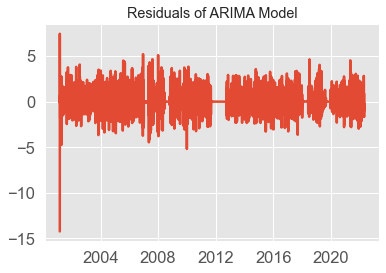

In [116]:
# Model Diagnostics
residuals = fitted_model.arima_res_.resid

# Now you can plot the residuals
plt.figure()
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

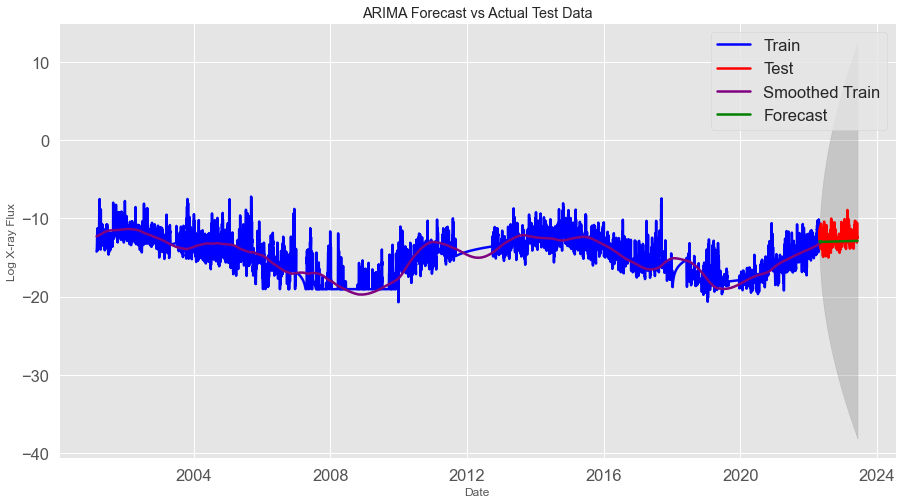

In [121]:
# Predict future values - we only need the number of periods in test_df
forecast_mean, conf_int = fitted_model.predict(n_periods=len(test_df), return_conf_int=True)

# Assuming the test_df index is a continuation of the train_df index
forecast_index = test_df.index

# Create a DataFrame for the forecasted values and the confidence intervals
forecast_df = pd.DataFrame({'forecast': forecast_mean, 'lower_conf': conf_int[:, 0], 'upper_conf': conf_int[:, 1]}, index=forecast_index)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(train_df['log_xray_flux'], label='Train', color='blue')  # Training data
plt.plot(test_df['log_xray_flux'], label='Test', color='red')  # Test data
plt.plot(smooth_train, label = 'Smoothed Train', color = 'purple') #Smoothed Data
plt.plot(forecast_df['forecast'], label='Forecast', color='green')  # Forecasted values
plt.fill_between(forecast_df.index, 
                 forecast_df['lower_conf'], 
                 forecast_df['upper_conf'], 
                 color='grey', alpha=0.3)  # Confidence intervals
plt.title('ARIMA Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [122]:
# Calculate error measures
mae = mean_absolute_error(test_df['log_xray_flux'], forecast_df['forecast'])
mse = mean_squared_error(test_df['log_xray_flux'], forecast_df['forecast'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['log_xray_flux'] - forecast_df['forecast']) / test_df['log_xray_flux'])) * 100

# Print error measures
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 0.8899373555896171
Mean Squared Error (MSE): 1.2424771345344237
Root Mean Squared Error (RMSE): 1.114664583870154
Mean Absolute Percentage Error (MAPE): 7.39%


Optimization terminated successfully    (Exit mode 0)
            Current function value: -16331.549547660288
            Iterations: 6
            Function evaluations: 25
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                16331.5
Distribution:                  Normal   AIC:                          -32649.1
Method:            Maximum Likelihood   BIC:                          -32600.4
                                        No. Observations:                 7725
Date:                Wed, Dec 20 2023   Df Residuals:                     7724
Time:                        19:44:54   Df Model:                            1
                                  Mean Model                                  
 

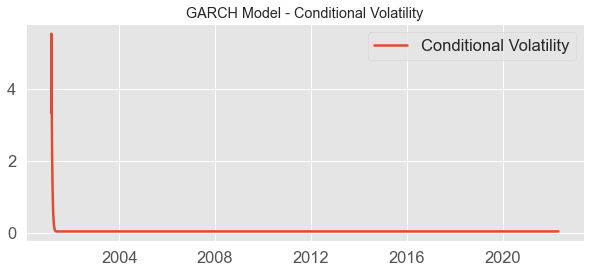

                 h.1      h.2       h.3     h.4       h.5
time                                                     
2022-04-24  0.002222  0.00237  0.002586  0.0029  0.003152


In [131]:
arima_model = sm.tsa.ARIMA(smooth_train, order=(3, 2, 3))
arima_results = arima_model.fit()

#Fit a GARCH model to the residuals of the ARIMA model
garch_model = arch_model(arima_results.resid, vol='Garch', p=3, q=2)
garch_results = garch_model.fit(update_freq=10)

# Print the summary of GARCH model results
print(garch_results.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(garch_results.conditional_volatility, label='Conditional Volatility')
plt.title('GARCH Model - Conditional Volatility')
plt.legend()
plt.show()

# Make forecasts of future volatility
forecasts = garch_results.forecast(horizon=5)
print(forecasts.variance[-1:])

This seems to make sense given the Holt fit and smoothing of the data.  Largely washing away the volatility.

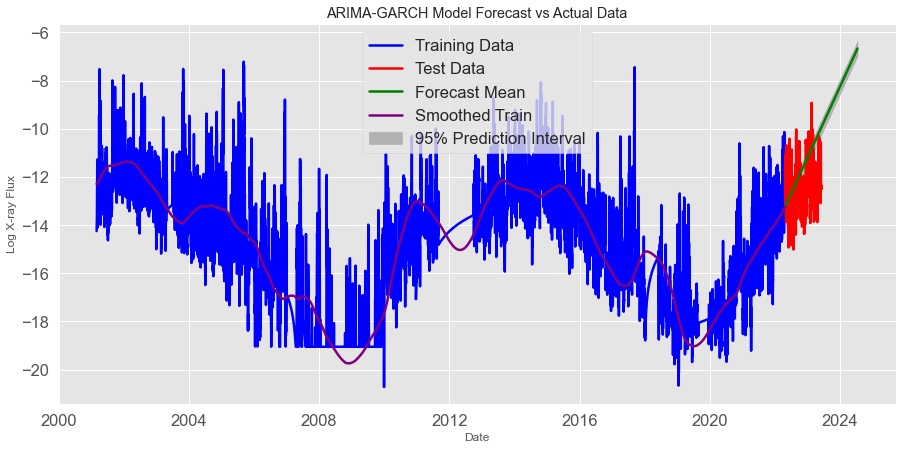

In [132]:
# Forecast future values using the ARIMA model
arima_forecast = arima_results.get_forecast(steps=2*len(test_df))
mean_forecast = arima_forecast.predicted_mean
confidence_intervals = arima_forecast.conf_int()

# Forecast future volatility using the GARCH model
garch_forecast = garch_results.forecast(horizon=2*len(test_df))
predicted_volatility = np.sqrt(garch_forecast.variance.dropna().values[-1, :])

extended_index = pd.date_range(start=test_df.index[0], periods=len(mean_forecast), freq='D')

# Combine the forecasts to create prediction intervals
lower_bounds = mean_forecast - 1.96 * predicted_volatility
upper_bounds = mean_forecast + 1.96 * predicted_volatility

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(train_df.index, train_df['log_xray_flux'], label='Training Data', color='blue')
plt.plot(test_df.index, test_df['log_xray_flux'], label='Test Data', color='red')
plt.plot(extended_index, mean_forecast, label='Forecast Mean', color='green')
plt.plot(smooth_train, label = 'Smoothed Train', color = 'purple') #Smoothed Data
plt.fill_between(extended_index, lower_bounds, upper_bounds, color='gray', alpha=0.5, label='95% Prediction Interval')
plt.title('ARIMA-GARCH Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [138]:
# Calculate error measures
mae = mean_absolute_error(test_df['log_xray_flux'], forecast_df['forecast'].iloc[:len(test_df)])
mse = mean_squared_error(test_df['log_xray_flux'], forecast_df['forecast'].iloc[:len(test_df)])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['log_xray_flux'] - forecast_df['forecast'].iloc[:len(test_df)]) / test_df['log_xray_flux'])) * 100

# Print error measures
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 0.8899373555896171
Mean Squared Error (MSE): 1.2424771345344237
Root Mean Squared Error (RMSE): 1.114664583870154
Mean Absolute Percentage Error (MAPE): 7.39%


In [160]:
# Apply custom resample for a 1-month frequency
df_month = df.resample('D').apply(custom_resample)
df_interpolated = df_month.interpolate(method='linear')
df_interpolated['flux_classification'] = df_interpolated['xray_flux'].apply(classify_flux)

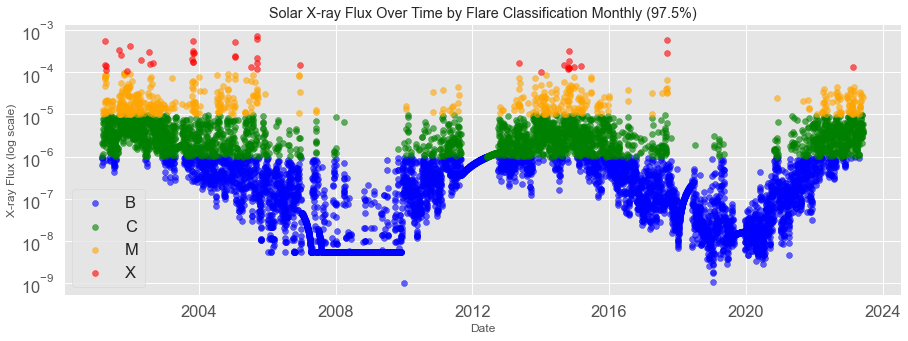

In [140]:
plot_helper2(df_interpolated,'Monthly (97.5%)')

In [161]:
# 95% train 5% test
train_df = df_interpolated.iloc[:int(len(df_interpolated) * 0.95)]
test_df = df_interpolated.iloc[int(len(df_interpolated) * 0.95):]

print(f"Training data: from {train_df.index[0]} to {train_df.index[-1]}")
print(f"Test data: from {test_df.index[0]} to {test_df.index[-1]}")

Training data: from 2001-03-01 00:00:00 to 2022-04-24 00:00:00
Test data: from 2022-04-25 00:00:00 to 2023-06-05 00:00:00


In [162]:
# Log Transformation
train_df['log_xray_flux'] = np.log(train_df['xray_flux'])
test_df['log_xray_flux'] = np.log(test_df['xray_flux'])

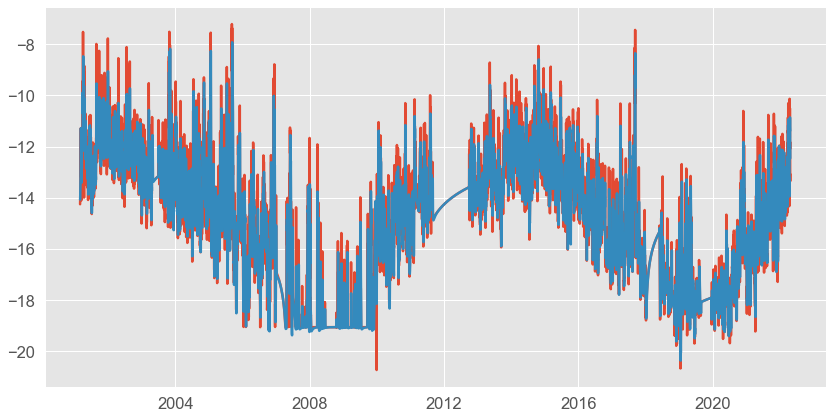

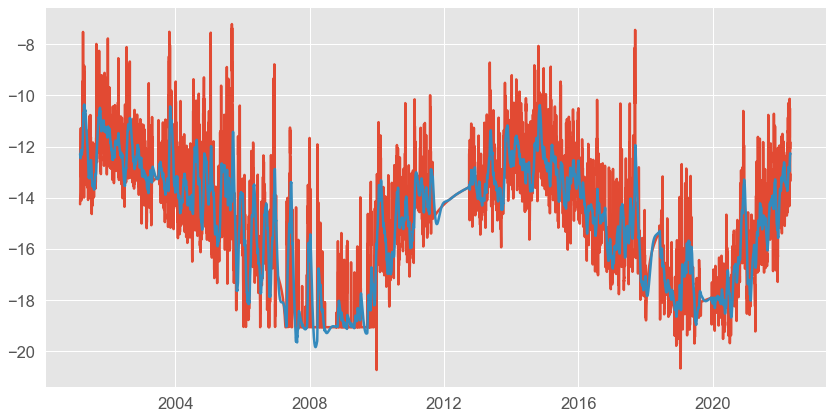

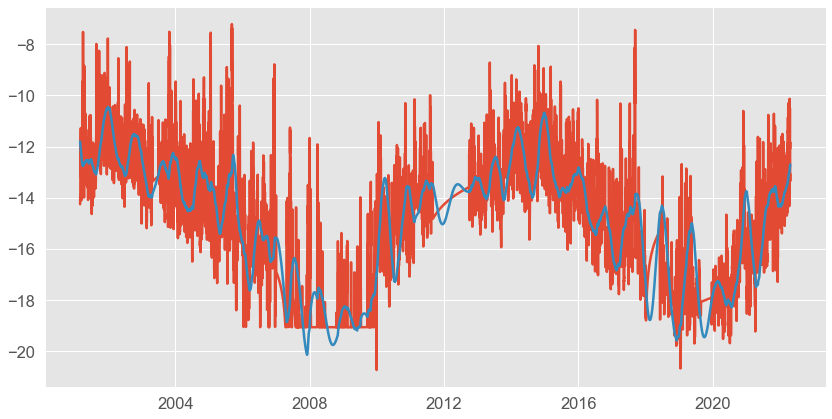

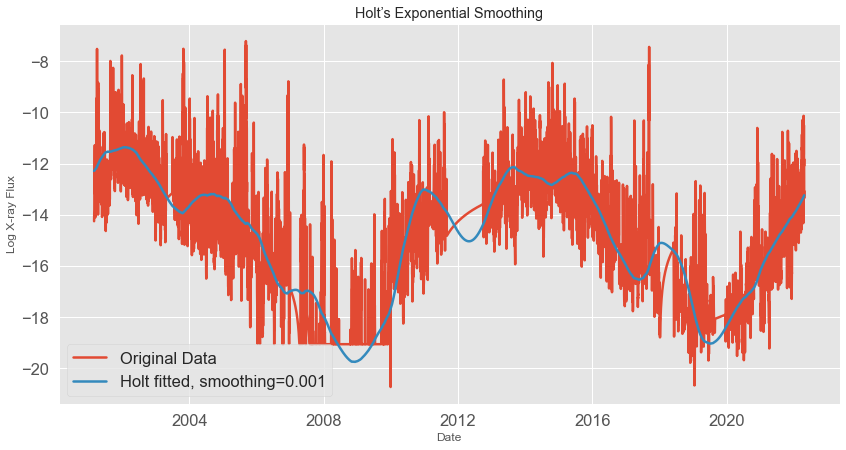

In [163]:
trends = train_df['log_xray_flux']

# Initialize the Holt model
Holt_model = ExponentialSmoothing(trends, trend='add', seasonal=None)

# Fit the model with different smoothing levels
for smoothing in [0.5, 0.05, 0.01, 0.001]:
    warnings.filterwarnings("ignore")
    Holt_model_fit = Holt_model.fit(smoothing_level=smoothing, smoothing_slope=0.05)
    
    # Plotting the results
    plt.figure(figsize=(14, 7))
    plt.plot(trends.index, trends, label='Original Data')
    plt.plot(trends.index, Holt_model_fit.fittedvalues, label=f'Holt fitted, smoothing={smoothing}')

plt.title('Holt’s Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

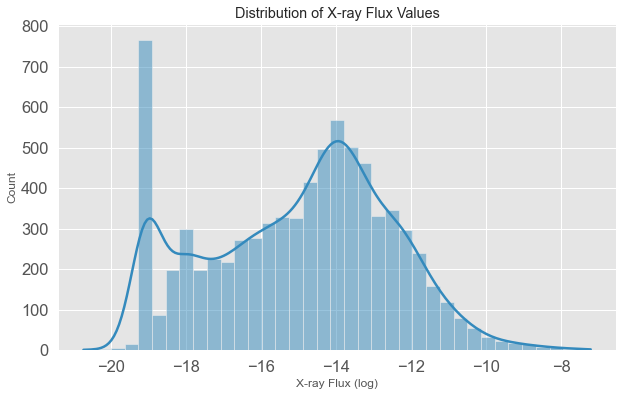

In [164]:
# Histogram of X-ray Flux
plt.figure(figsize=(10, 6))
sns.histplot(train_df['log_xray_flux'], kde=True)
plt.title('Distribution of X-ray Flux Values')
plt.xlabel('X-ray Flux (log)')
plt.show()

In [165]:
check_stationarity(train_df['log_xray_flux'])

Results of Dickey-Fuller Test:
ADF Statistic: -4.089387184467257
p-value: 0.0010083937638071952
Critial Values [1%]: -3.431199653412552
Critial Values [5%]: -2.861915483909216
Critial Values [10%]: -2.5669698655478084


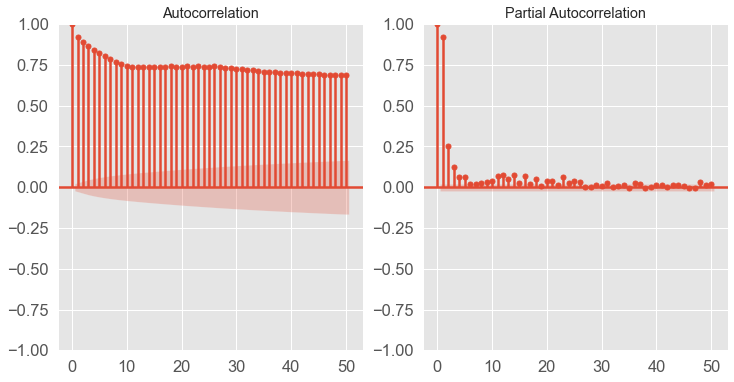

In [166]:
# Model Identification
# Plot ACF and PACF to determine p and q
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sm.graphics.tsa.plot_acf(train_df['log_xray_flux'], lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(train_df['log_xray_flux'], lags=50, ax=ax2)
plt.show()

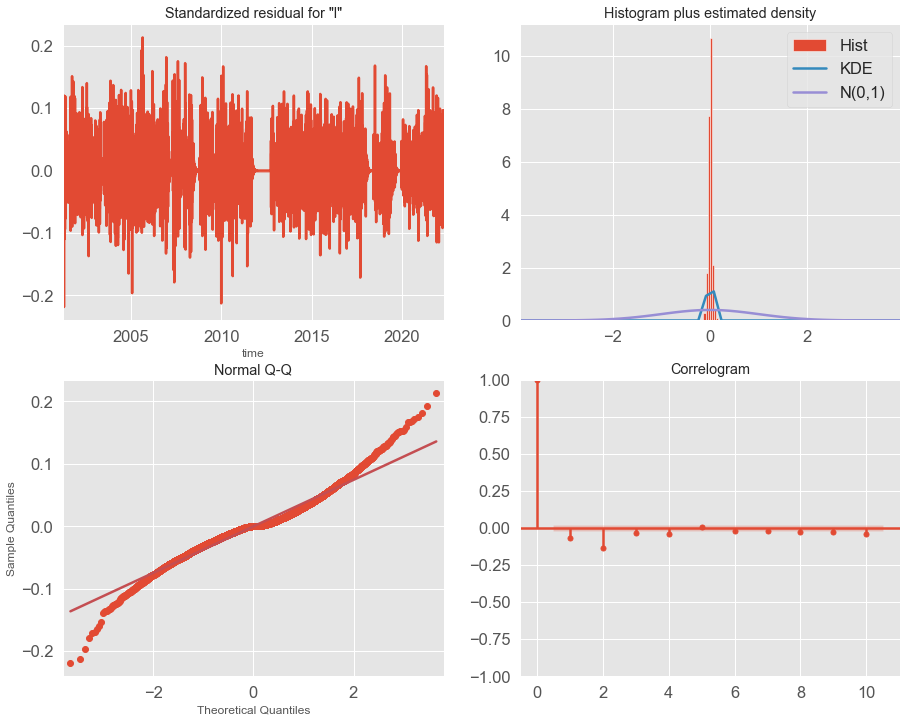

In [169]:
# The seasonal period for 11 years with monthly data
fourier = FourierFeaturizer(m=12*11, k=5)  # '12*11' for an 11-year cycle with monthly data
fourier_terms, _ = fourier.fit_transform(train_df['log_xray_flux'])

# Convert the Fourier terms into a DataFrame
fourier_df = pd.DataFrame(fourier_terms, index=train_df.index)

# Include the Fourier terms in the SARIMAX model as exogenous variables
sarima_model = sm.tsa.SARIMAX(train_df['log_xray_flux'],
                              order=(1, 1, 0),
                              seasonal_order=(1, 1, 1, 12),  # Annual seasonality
                              exog=fourier_df,
                              enforce_stationarity=False,
                              enforce_invertibility=False)

# Fit the model
sarima_results = sarima_model.fit()

# Check diagnostics
sarima_results.plot_diagnostics(figsize=(15, 12))
plt.show()

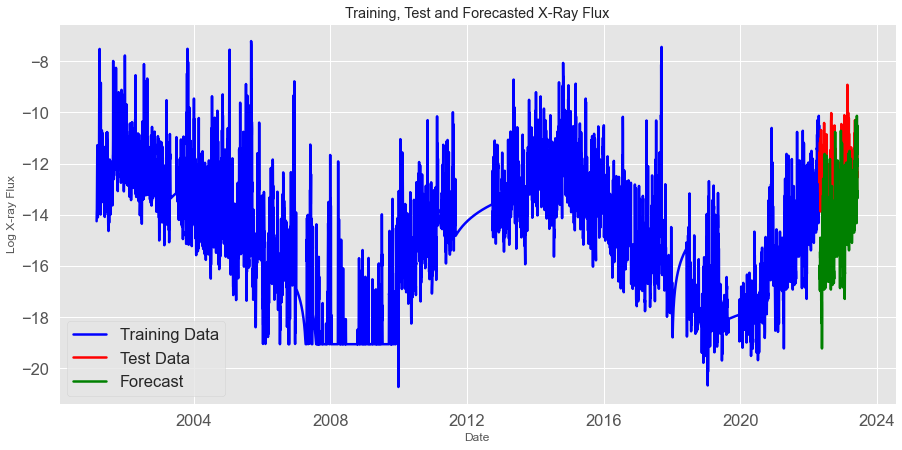

In [174]:
# Length of the forecast (size of test_df)
forecast_steps = len(test_df)
forecast_exog = fourier_df.iloc[-forecast_steps:]

# Generate the forecast
forecast = sarima_results.get_forecast(steps=forecast_steps, exog=forecast_exog)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

forecast_index = test_df.index

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(train_df.index, train_df['log_xray_flux'], label='Training Data', color='blue')
plt.plot(test_df.index, test_df['log_xray_flux'], label='Test Data', color='red')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.3)
plt.title('Training, Test and Forecasted X-Ray Flux')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

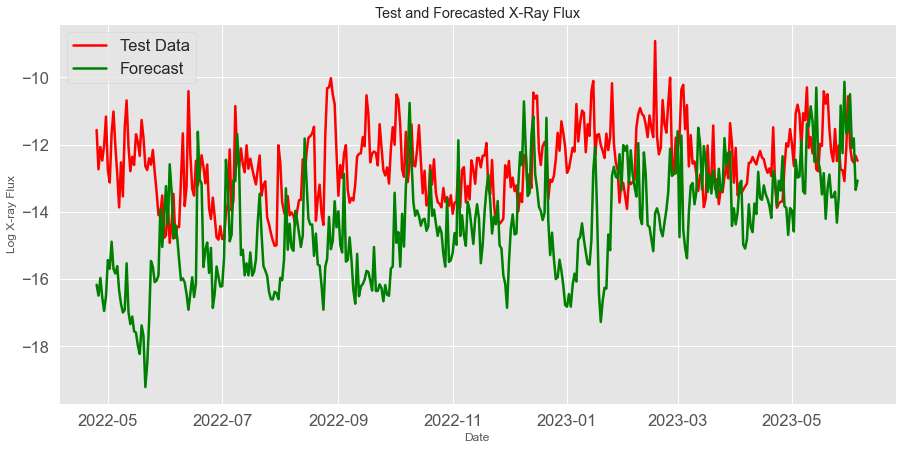

In [184]:
# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(test_df.index, test_df['log_xray_flux'], label='Test Data', color='red')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.3)
plt.title('Test and Forecasted X-Ray Flux')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [176]:
# Calculate error measures
mae = mean_absolute_error(test_df['log_xray_flux'], forecast_mean)
mse = mean_squared_error(test_df['log_xray_flux'], forecast_mean)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['log_xray_flux'] - forecast_mean) / test_df['log_xray_flux'])) * 100

# Print error measures
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 2.1428050267804086
Mean Squared Error (MSE): 6.746563663270184
Root Mean Squared Error (RMSE): 2.597414803852127
Mean Absolute Percentage Error (MAPE): 17.66%


In [198]:
# Length of the forecast (size of test_df)
forecast_steps = 11*len(test_df)

forecast_exog = fourier_df.iloc[-forecast_steps:]

# Generate the forecast
forecast = sarima_results.get_forecast(steps=forecast_steps, exog=forecast_exog)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

forecast_index = pd.date_range(start=test_df.index[0], periods=len(forecast_mean), freq='D')

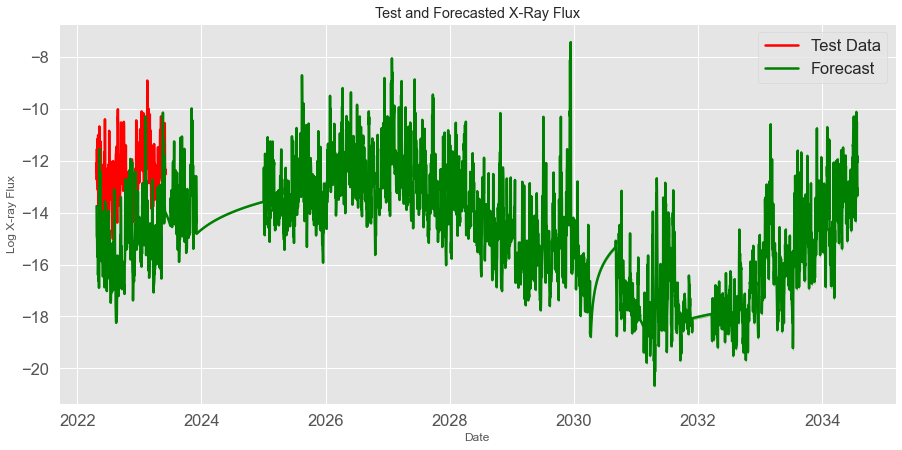

In [202]:
# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(test_df.index, test_df['log_xray_flux'], label='Test Data', color='red')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.3)
plt.title('Test and Forecasted X-Ray Flux')
plt.xlabel('Date')
plt.ylabel('Log X-ray Flux')
plt.legend()
plt.show()

In [210]:
forecast_df = pd.DataFrame({
    'xray_flux': 10**forecast_mean
}, index=forecast_index)
forecast_df['flux_classification'] = forecast_df['xray_flux'].apply(classify_flux)

In [211]:
forecast_df

xray_flux flux_classification
2022-04-25  1.770679e-14                   B
2022-04-26  1.240329e-15                   B
2022-04-27  1.141152e-15                   B
2022-04-28  9.609594e-16                   B
2022-04-29  2.011892e-16                   B
...                  ...                 ...
2034-07-23  3.144304e-11                   B
2034-07-24  8.030989e-13                   B
2034-07-25  1.523487e-12                   B
2034-07-26  4.463046e-14                   B
2034-07-27  8.450979e-14                   B

[4477 rows x 2 columns]

In [213]:
test_df

xray_flux flux_classification  log_xray_flux
time                                                    
2022-04-25   0.000009                   C     -11.569562
2022-04-26   0.000003                   C     -12.737819
2022-04-27   0.000006                   C     -12.072000
2022-04-28   0.000004                   C     -12.475158
2022-04-29   0.000006                   C     -12.025389
...               ...                 ...            ...
2023-06-01   0.000006                   C     -12.040512
2023-06-02   0.000004                   C     -12.457698
2023-06-03   0.000004                   C     -12.538779
2023-06-04   0.000004                   C     -12.337346
2023-06-05   0.000004                   C     -12.484679

[407 rows x 3 columns]

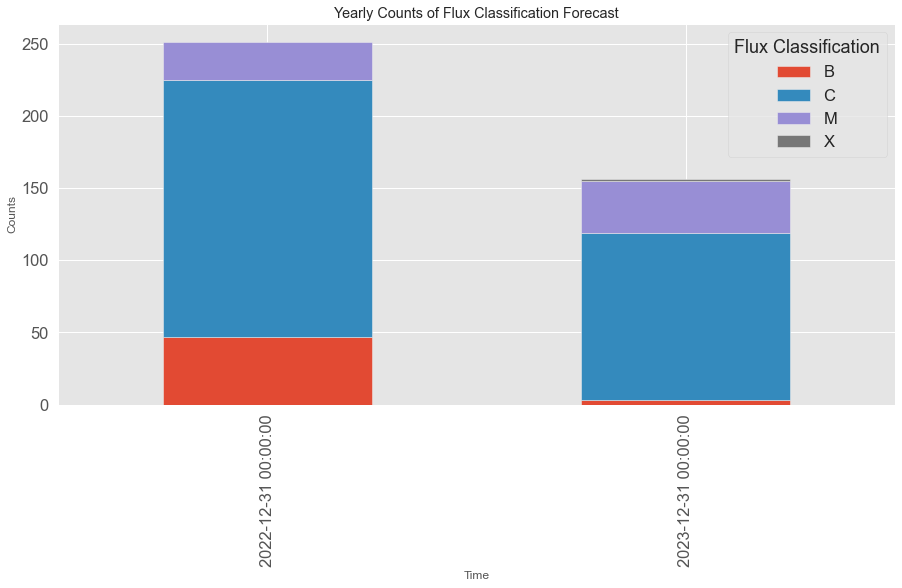

In [231]:
yearly_counts = test_df.groupby([pd.Grouper(freq='Y'), 'flux_classification']).size().unstack().fillna(0)
plot_classification_counts(yearly_counts, 'Yearly Counts of Flux Classification Forecast')

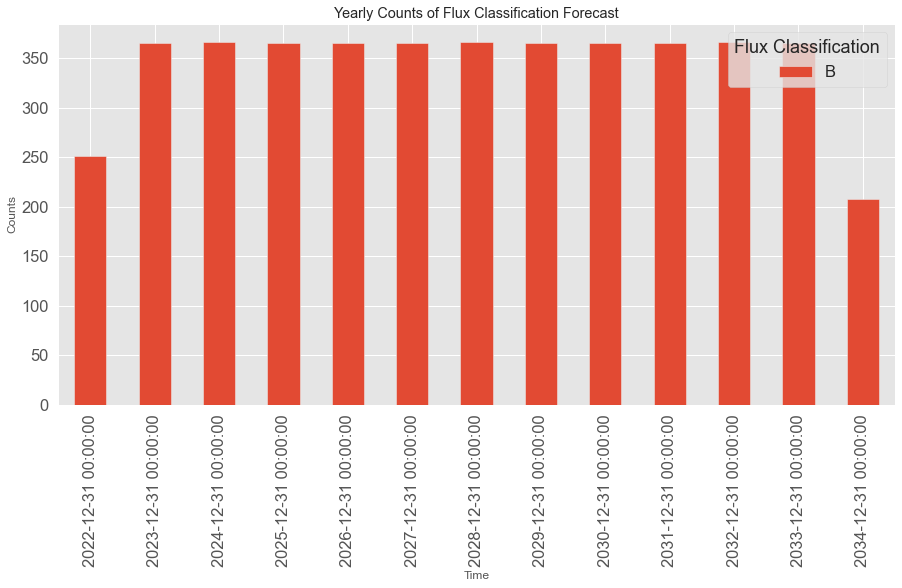

In [230]:
yearly_counts = forecast_df.groupby([pd.Grouper(freq='Y'), 'flux_classification']).size().unstack().fillna(0)
plot_classification_counts(yearly_counts, 'Yearly Counts of Flux Classification Forecast')

Future Work may include looking at other time series data like sunspot counts that could act as exogeneous variables for the x-ray flux.

In [217]:
sunspot_df = pd.read_csv('SN_d_tot_V2.0.csv', sep =';', header = None)
sunspot_df.columns = ['year', 'month', 'day', 'decimal year', 'SNvalue' , 'SNerror', 'Count','Unknown']
sunspot_df.head()

year  month  day  decimal year  SNvalue  SNerror  Count  Unknown
0  1818      1    1      1818.001       -1     -1.0      0        1
1  1818      1    2      1818.004       -1     -1.0      0        1
2  1818      1    3      1818.007       -1     -1.0      0        1
3  1818      1    4      1818.010       -1     -1.0      0        1
4  1818      1    5      1818.012       -1     -1.0      0        1

In [218]:
sunspot_df.Count.describe()

count    75209.000000
mean         5.127870
std          9.323881
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         69.000000
Name: Count, dtype: float64

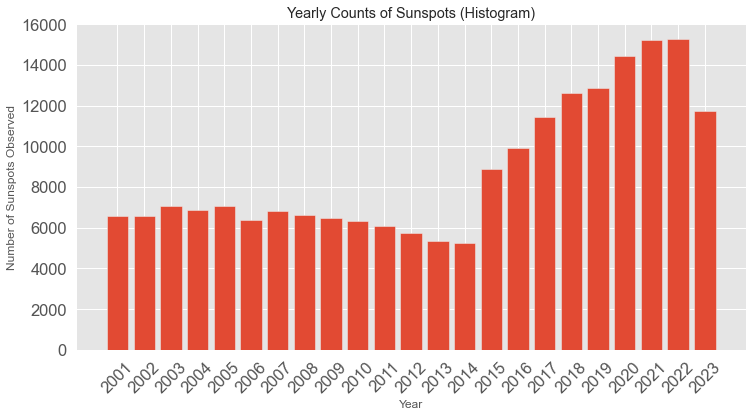

In [229]:
# Grouping data by year and aggregating sunspot counts
fil_sunspot = sunspot_df[sunspot_df['year']>2000]
yearly_counts = fil_sunspot.groupby('year')['Count'].sum().reset_index()

# Creating a boxplot with years on the x-axis and counts on the y-axis
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts['year'], yearly_counts['Count'])
plt.title('Yearly Counts of Sunspots (Histogram)')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots Observed')
plt.xticks(yearly_counts['year'], rotation=45)
plt.show()